In [1]:
import pandas as pd
import numpy as np
from gensim import corpora, models, similarities
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from mpltools import style
import matplotlib.pyplot as plt
%matplotlib inline

/home/R2016hwang/.pyenv/versions/3.6.2/lib/python3.6/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
topnum = 10

In [4]:
f = open('../data/news/wo_empty_line_en_1000.txt','r')
documents = f.readlines()

In [5]:
texts = [ [word for word in document.split()] for document in documents]

In [32]:
np.array(texts)[1]

['chinese',
 'budget',
 'smartphone',
 'maker',
 'xiaomi',
 'plan',
 'sell',
 'handset',
 'more',
 'double',
 'number',
 'it',
 'sell',
 'it',
 'chairman',
 'say',
 'thursday',
 'reinforce',
 'company',
 'ambition',
 'outsell',
 'more',
 'expensive',
 'offering',
 'apple',
 'inc',
 'samsung',
 'electronics',
 'co',
 'ltd.',
 'lei',
 'jun',
 'who',
 'be',
 'also',
 'co-founder',
 'tech',
 'firm',
 'make',
 'projection',
 'sina',
 'weibo',
 'china',
 'most',
 'widely',
 'use',
 'microblogging',
 'site',
 'it',
 'be',
 'reposted',
 'xiaomi',
 'website',
 'we',
 'again',
 'promise',
 'we',
 'will',
 'least',
 'phone',
 'he',
 'write',
 'china',
 'be',
 'world',
 'big',
 'market',
 'smartphones',
 'lei',
 'say',
 'private',
 'hold',
 'xiaomi',
 'have',
 'sell',
 'smartphones',
 'percent',
 'increase',
 'sale',
 'revenue',
 'include',
 'tax',
 'rise',
 'percent',
 'yuan',
 'xiaomi',
 'sale',
 'growth',
 'far',
 'exceed',
 'projection',
 'global',
 'smartphone',
 'market',
 'which',
 'be',
 '

In [7]:
dictionary = corpora.Dictionary(texts)

2018-04-19 11:07:28,121 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-04-19 11:07:28,425 : INFO : built Dictionary(11286 unique tokens: ['u.s.', 'commerce', 'department', 'seasonal', 'adjust']...) from 1000 documents (total 264846 corpus positions)


In [8]:
sentences = word2vec.LineSentence('../data/news/wo_empty_line_en.txt')

In [9]:
model_sg = word2vec.Word2Vec(sentences,workers=14,size=100,sg=1,alpha=0.001)
model_sg.save('model_sg_liu_1000.w2v')
model_CBOW = word2vec.Word2Vec(sentences,workers=14,size=100,sg=0,alpha=0.001)
model_CBOW.save('model_CBOW_liu_1000.w2v')

2018-04-19 11:09:11,691 : INFO : collecting all words and their counts
2018-04-19 11:09:11,861 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-19 11:09:12,730 : INFO : PROGRESS: at sentence #10000, processed 2764056 words, keeping 34211 word types
2018-04-19 11:09:13,453 : INFO : PROGRESS: at sentence #20000, processed 5541284 words, keeping 48010 word types
2018-04-19 11:09:14,108 : INFO : PROGRESS: at sentence #30000, processed 8161728 words, keeping 60011 word types
2018-04-19 11:09:14,756 : INFO : PROGRESS: at sentence #40000, processed 10732869 words, keeping 69944 word types
2018-04-19 11:09:15,420 : INFO : PROGRESS: at sentence #50000, processed 13357086 words, keeping 79518 word types
2018-04-19 11:09:16,035 : INFO : PROGRESS: at sentence #60000, processed 15692955 words, keeping 86265 word types
2018-04-19 11:09:16,221 : INFO : collected 88684 word types from a corpus of 16413827 raw words and 63386 sentences
2018-04-19 11:09:16,222 : INFO : 

2018-04-19 11:10:16,298 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-04-19 11:10:16,299 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-04-19 11:10:16,312 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-04-19 11:10:16,314 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-19 11:10:16,322 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-19 11:10:16,327 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-19 11:10:16,331 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-19 11:10:16,332 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-19 11:10:16,343 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-19 11:10:16,344 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-19 11:10:16,350 : INFO : worker thread finished; awaiting finish of 1 more threa

2018-04-19 11:11:10,026 : INFO : PROGRESS: at 66.16% examples, 1010041 words/s, in_qsize 26, out_qsize 1
2018-04-19 11:11:11,029 : INFO : PROGRESS: at 67.60% examples, 1010945 words/s, in_qsize 28, out_qsize 0
2018-04-19 11:11:12,045 : INFO : PROGRESS: at 69.11% examples, 1012845 words/s, in_qsize 27, out_qsize 1
2018-04-19 11:11:13,049 : INFO : PROGRESS: at 70.55% examples, 1012989 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:11:14,073 : INFO : PROGRESS: at 71.84% examples, 1011131 words/s, in_qsize 24, out_qsize 3
2018-04-19 11:11:15,084 : INFO : PROGRESS: at 73.28% examples, 1011719 words/s, in_qsize 26, out_qsize 2
2018-04-19 11:11:16,086 : INFO : PROGRESS: at 74.69% examples, 1012084 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:11:17,103 : INFO : PROGRESS: at 76.08% examples, 1013107 words/s, in_qsize 27, out_qsize 2
2018-04-19 11:11:18,121 : INFO : PROGRESS: at 77.48% examples, 1012044 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:11:19,132 : INFO : PROGRESS: at 79.21% ex

In [2]:
model_sg = word2vec.Word2Vec.load('model_sg_liu_1000.w2v')
model_CBOW = word2vec.Word2Vec.load('model_CBOW_liu_1000.w2v')

2018-05-06 15:50:12,533 : INFO : loading Word2Vec object from model_sg_liu_1000.w2v
2018-05-06 15:50:13,247 : INFO : loading wv recursively from model_sg_liu_1000.w2v.wv.* with mmap=None
2018-05-06 15:50:13,248 : INFO : setting ignored attribute syn0norm to None
2018-05-06 15:50:13,250 : INFO : setting ignored attribute cum_table to None
2018-05-06 15:50:13,251 : INFO : loaded model_sg_liu_1000.w2v
2018-05-06 15:50:13,317 : INFO : loading Word2Vec object from model_CBOW_liu_1000.w2v
2018-05-06 15:50:13,782 : INFO : loading wv recursively from model_CBOW_liu_1000.w2v.wv.* with mmap=None
2018-05-06 15:50:13,783 : INFO : setting ignored attribute syn0norm to None
2018-05-06 15:50:13,785 : INFO : setting ignored attribute cum_table to None
2018-05-06 15:50:13,786 : INFO : loaded model_CBOW_liu_1000.w2v


In [ ]:
model_sg_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_2.save('model_sg_liu_1000_2.w2v')

model_CBOW_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_2.save('model_CBOW_liu_1000_2.w2v')

2018-04-19 11:26:45,800 : INFO : collecting all words and their counts
2018-04-19 11:26:45,802 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-19 11:26:46,699 : INFO : PROGRESS: at sentence #10000, processed 2764056 words, keeping 34211 word types
2018-04-19 11:26:47,433 : INFO : PROGRESS: at sentence #20000, processed 5541284 words, keeping 48010 word types
2018-04-19 11:26:48,104 : INFO : PROGRESS: at sentence #30000, processed 8161728 words, keeping 60011 word types
2018-04-19 11:26:48,768 : INFO : PROGRESS: at sentence #40000, processed 10732869 words, keeping 69944 word types
2018-04-19 11:26:49,454 : INFO : PROGRESS: at sentence #50000, processed 13357086 words, keeping 79518 word types
2018-04-19 11:26:50,081 : INFO : PROGRESS: at sentence #60000, processed 15692955 words, keeping 86265 word types
2018-04-19 11:26:50,281 : INFO : collected 88684 word types from a corpus of 16413827 raw words and 63386 sentences
2018-04-19 11:26:50,283 : INFO : 

2018-04-19 11:27:59,426 : INFO : PROGRESS: at 15.65% examples, 176871 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:28:00,458 : INFO : PROGRESS: at 15.92% examples, 176783 words/s, in_qsize 28, out_qsize 0
2018-04-19 11:28:01,477 : INFO : PROGRESS: at 16.15% examples, 176987 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:28:02,494 : INFO : PROGRESS: at 16.40% examples, 176947 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:28:03,495 : INFO : PROGRESS: at 16.66% examples, 176941 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:28:04,511 : INFO : PROGRESS: at 16.94% examples, 177186 words/s, in_qsize 26, out_qsize 1
2018-04-19 11:28:05,520 : INFO : PROGRESS: at 17.19% examples, 177410 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:28:06,535 : INFO : PROGRESS: at 17.50% examples, 177372 words/s, in_qsize 26, out_qsize 1
2018-04-19 11:28:07,560 : INFO : PROGRESS: at 17.77% examples, 177191 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:28:08,592 : INFO : PROGRESS: at 18.11% examples, 1

2018-04-19 11:29:21,139 : INFO : PROGRESS: at 35.72% examples, 179462 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:22,144 : INFO : PROGRESS: at 35.99% examples, 179493 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:23,249 : INFO : PROGRESS: at 36.22% examples, 179412 words/s, in_qsize 26, out_qsize 1
2018-04-19 11:29:24,251 : INFO : PROGRESS: at 36.50% examples, 179570 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:25,313 : INFO : PROGRESS: at 36.76% examples, 179423 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:26,340 : INFO : PROGRESS: at 37.05% examples, 179739 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:27,368 : INFO : PROGRESS: at 37.30% examples, 179631 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:28,382 : INFO : PROGRESS: at 37.61% examples, 179544 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:29:29,395 : INFO : PROGRESS: at 37.90% examples, 179566 words/s, in_qsize 26, out_qsize 1
2018-04-19 11:29:30,430 : INFO : PROGRESS: at 38.21% examples, 1

2018-04-19 11:30:43,004 : INFO : PROGRESS: at 55.73% examples, 179955 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:44,048 : INFO : PROGRESS: at 55.96% examples, 179827 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:45,088 : INFO : PROGRESS: at 56.23% examples, 179935 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:46,140 : INFO : PROGRESS: at 56.45% examples, 179810 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:47,176 : INFO : PROGRESS: at 56.78% examples, 179920 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:48,209 : INFO : PROGRESS: at 56.98% examples, 179819 words/s, in_qsize 27, out_qsize 1
2018-04-19 11:30:49,280 : INFO : PROGRESS: at 57.28% examples, 179940 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:50,280 : INFO : PROGRESS: at 57.58% examples, 179856 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:51,353 : INFO : PROGRESS: at 57.92% examples, 179933 words/s, in_qsize 27, out_qsize 0
2018-04-19 11:30:52,390 : INFO : PROGRESS: at 58.21% examples, 1

In [3]:
model_sg_2 = word2vec.Word2Vec.load('model_sg_liu_1000_2.w2v')
model_CBOW_2 = word2vec.Word2Vec.load('model_CBOW_liu_1000_2.w2v')

2018-05-06 15:50:16,142 : INFO : loading Word2Vec object from model_sg_liu_1000_2.w2v
2018-05-06 15:50:17,036 : INFO : loading wv recursively from model_sg_liu_1000_2.w2v.wv.* with mmap=None
2018-05-06 15:50:17,038 : INFO : setting ignored attribute syn0norm to None
2018-05-06 15:50:17,039 : INFO : setting ignored attribute cum_table to None
2018-05-06 15:50:17,040 : INFO : loaded model_sg_liu_1000_2.w2v
2018-05-06 15:50:17,201 : INFO : loading Word2Vec object from model_CBOW_liu_1000_2.w2v
2018-05-06 15:50:17,987 : INFO : loading wv recursively from model_CBOW_liu_1000_2.w2v.wv.* with mmap=None
2018-05-06 15:50:17,988 : INFO : setting ignored attribute syn0norm to None
2018-05-06 15:50:17,989 : INFO : setting ignored attribute cum_table to None
2018-05-06 15:50:17,991 : INFO : loaded model_CBOW_liu_1000_2.w2v


In [11]:
def comparetopn(model,model_extend,word,topnum,anchdict_text2id,anchdict_id2text):

    similar_anchor_id = model.wv.most_similar(anchdict_text2id[word], topn=topnum)
    similar_title = []
    for x in similar_anchor_id:
        if x[0] in anchdict_id2text: 
            similar_title.append((anchdict_id2text[x[0]],x[1]))
        else:
            similar_title.append((x[0],x[1]))

    similar_anchor_id_extended = model_extend.wv.most_similar(anchdict_text2id[word], topn=topnum)
    similar_title_extended = []
    for x in similar_anchor_id_extended:
        if x[0] in anchdict_id2text: 
            similar_title_extended.append((anchdict_id2text[x[0]],x[1]))
        else:
            similar_title_extended.append((x[0],x[1]))
            
    for x , y in zip(similar_title, similar_title_extended):
        print(x, y)

comparetopn(model_sg,model_CBOW,'计算机科学',20,anchdict_text2id,anchdict_id2text)

NameError: name 'anchdict_text2id' is not defined

In [41]:
model_sg.wv.most_similar('toyota', topn=topnum)

[('honda', 0.978531002998352),
 ('chrysler', 0.9644594192504883),
 ('nissan', 0.9641338586807251),
 ('ford', 0.9612938761711121),
 ('bmw', 0.9473928213119507),
 ('motor', 0.9442141652107239),
 ('automaker', 0.9429740905761719),
 ('volkswagen', 0.9312126636505127),
 ('daimler', 0.92311692237854),
 ('kia', 0.9221163392066956)]

In [42]:
model_CBOW.wv.most_similar('toyota', topn=topnum)

[('nissan', 0.9936795234680176),
 ('ford', 0.9922592639923096),
 ('honda', 0.9921597242355347),
 ('chrysler', 0.9910722970962524),
 ('mazda', 0.9907946586608887),
 ('volkswagen', 0.9884783029556274),
 ('mcdonald', 0.9863333702087402),
 ('daimler', 0.9825839996337891),
 ('entertainment', 0.9817795753479004),
 ('zte', 0.9814733266830444)]

In [43]:
model_sg_2.wv.most_similar('toyota', topn=topnum)

2018-04-23 00:54:49,743 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.9403865337371826),
 ('nissan', 0.9148766994476318),
 ('mazda', 0.8930751085281372),
 ('automaker', 0.8653019666671753),
 ('ford', 0.8597928285598755),
 ('motor', 0.8510335683822632),
 ('gm', 0.8503154516220093),
 ('camry', 0.8372143507003784),
 ('daihatsu', 0.8259471654891968),
 ('acura', 0.8222695589065552)]

In [44]:
model_CBOW_2.wv.most_similar('toyota', topn=topnum)

2018-04-23 00:54:50,034 : INFO : precomputing L2-norms of word weight vectors


[('honda', 0.9018310308456421),
 ('mazda', 0.8940041661262512),
 ('nissan', 0.8695518970489502),
 ('camry', 0.8325285315513611),
 ('ford', 0.8214797377586365),
 ('corolla', 0.8092081546783447),
 ('kia', 0.8083857893943787),
 ('lexus', 0.8018977046012878),
 ('prius', 0.7889842987060547),
 ('subaru', 0.7848116159439087)]

In [45]:
model_sg.wv.most_similar('china', topn=topnum)

[('chinese', 0.8890647888183594),
 ('beijing', 0.8164621591567993),
 ('mainland', 0.7681506872177124),
 ('india', 0.7585848569869995),
 ('property', 0.7559689283370972),
 ('industry', 0.7337697744369507),
 ('asia', 0.7314869165420532),
 ('indonesia', 0.7313505411148071),
 ('shanghai', 0.7302306890487671),
 ('agricultural', 0.7199952602386475)]

In [30]:
model_CBOW.wv.most_similar('china', topn=topnum)

[('chinese', 0.8603976964950562),
 ('top', 0.8591727018356323),
 ('asia', 0.8414890766143799),
 ('india', 0.8400260210037231),
 ('world', 0.8297812938690186),
 ('big', 0.8138731122016907),
 ('japan', 0.8107923269271851),
 ('second-largest', 0.8064502477645874),
 ('america', 0.8014043569564819),
 ('second-biggest', 0.798937976360321)]

In [4]:
model_Google_n300 = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

2018-05-06 15:50:22,736 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2018-05-06 15:50:55,197 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [5]:
model_Google_n300.wv.most_similar('toyota', topn=topnum)

NameError: name 'topnum' is not defined

In [ ]:
model_Google_n300.wv.most_similar('china', topn=topnum)

In [ ]:
sentences = word2vec.LineSentence('../data/news/wo_empty_line_jp.txt')

In [51]:
model_sg_jp = word2vec.Word2Vec(sentences,workers=14,size=100,sg=1,alpha=0.001)
model_sg_jp.save('model_sg_jp_liu_1000.w2v')
model_CBOW_jp = word2vec.Word2Vec(sentences,workers=14,size=100,sg=0,alpha=0.001)
model_CBOW_jp.save('model_CBOW_jp_liu_1000.w2v')

2018-04-23 00:58:48,798 : INFO : collecting all words and their counts
2018-04-23 00:58:48,969 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-23 00:58:49,513 : INFO : PROGRESS: at sentence #10000, processed 1351313 words, keeping 19559 word types
2018-04-23 00:58:49,948 : INFO : PROGRESS: at sentence #20000, processed 2652910 words, keeping 25997 word types
2018-04-23 00:58:50,298 : INFO : PROGRESS: at sentence #30000, processed 3877830 words, keeping 31059 word types
2018-04-23 00:58:50,641 : INFO : PROGRESS: at sentence #40000, processed 5128183 words, keeping 34668 word types
2018-04-23 00:58:50,990 : INFO : PROGRESS: at sentence #50000, processed 6351900 words, keeping 37965 word types
2018-04-23 00:58:51,314 : INFO : PROGRESS: at sentence #60000, processed 7514847 words, keeping 40269 word types
2018-04-23 00:58:51,406 : INFO : collected 40968 word types from a corpus of 7841326 raw words and 63386 sentences
2018-04-23 00:58:51,407 : INFO : Load

2018-04-23 00:59:24,706 : INFO : PROGRESS: at 1.93% examples, 727908 words/s, in_qsize 27, out_qsize 0
2018-04-23 00:59:25,710 : INFO : PROGRESS: at 3.98% examples, 745456 words/s, in_qsize 26, out_qsize 1
2018-04-23 00:59:26,717 : INFO : PROGRESS: at 6.20% examples, 756290 words/s, in_qsize 27, out_qsize 0
2018-04-23 00:59:27,727 : INFO : PROGRESS: at 8.40% examples, 751544 words/s, in_qsize 26, out_qsize 1
2018-04-23 00:59:28,728 : INFO : PROGRESS: at 10.47% examples, 750853 words/s, in_qsize 28, out_qsize 1
2018-04-23 00:59:29,739 : INFO : PROGRESS: at 12.85% examples, 752432 words/s, in_qsize 26, out_qsize 1
2018-04-23 00:59:30,743 : INFO : PROGRESS: at 14.98% examples, 749362 words/s, in_qsize 23, out_qsize 4
2018-04-23 00:59:31,782 : INFO : PROGRESS: at 17.34% examples, 747279 words/s, in_qsize 27, out_qsize 0
2018-04-23 00:59:32,819 : INFO : PROGRESS: at 19.85% examples, 746649 words/s, in_qsize 27, out_qsize 1
2018-04-23 00:59:33,846 : INFO : PROGRESS: at 22.09% examples, 75428

In [52]:
model_sg_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_2.save('model_sg_jp_liu_1000_2.w2v')

model_CBOW_2 = word2vec.Word2Vec(sentences,workers=14,size=64,sg=0,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_2.save('model_CBOW_jp_liu_1000_2.w2v')

2018-04-23 01:00:07,399 : INFO : collecting all words and their counts
2018-04-23 01:00:07,401 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-23 01:00:07,851 : INFO : PROGRESS: at sentence #10000, processed 1351313 words, keeping 19559 word types
2018-04-23 01:00:08,272 : INFO : PROGRESS: at sentence #20000, processed 2652910 words, keeping 25997 word types
2018-04-23 01:00:08,639 : INFO : PROGRESS: at sentence #30000, processed 3877830 words, keeping 31059 word types
2018-04-23 01:00:09,018 : INFO : PROGRESS: at sentence #40000, processed 5128183 words, keeping 34668 word types
2018-04-23 01:00:09,378 : INFO : PROGRESS: at sentence #50000, processed 6351900 words, keeping 37965 word types
2018-04-23 01:00:09,717 : INFO : PROGRESS: at sentence #60000, processed 7514847 words, keeping 40269 word types
2018-04-23 01:00:09,818 : INFO : collected 40968 word types from a corpus of 7841326 raw words and 63386 sentences
2018-04-23 01:00:09,819 : INFO : Load

2018-04-23 01:01:16,248 : INFO : PROGRESS: at 38.37% examples, 201381 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:17,266 : INFO : PROGRESS: at 38.87% examples, 201556 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:18,338 : INFO : PROGRESS: at 39.68% examples, 201577 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:19,454 : INFO : PROGRESS: at 40.38% examples, 201831 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:20,568 : INFO : PROGRESS: at 40.91% examples, 201598 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:21,586 : INFO : PROGRESS: at 41.54% examples, 201650 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:22,632 : INFO : PROGRESS: at 42.04% examples, 201831 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:23,635 : INFO : PROGRESS: at 42.67% examples, 201789 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:24,694 : INFO : PROGRESS: at 43.19% examples, 201580 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:01:25,709 : INFO : PROGRESS: at 43.81% examples, 2

2018-04-23 01:02:39,045 : INFO : PROGRESS: at 86.02% examples, 200419 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:40,046 : INFO : PROGRESS: at 86.66% examples, 200304 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:41,058 : INFO : PROGRESS: at 87.19% examples, 200215 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:42,066 : INFO : PROGRESS: at 87.77% examples, 200153 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:43,067 : INFO : PROGRESS: at 88.39% examples, 200337 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:44,101 : INFO : PROGRESS: at 88.84% examples, 200074 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:45,298 : INFO : PROGRESS: at 89.55% examples, 199991 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:46,512 : INFO : PROGRESS: at 90.06% examples, 200007 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:47,530 : INFO : PROGRESS: at 90.82% examples, 200096 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:02:48,620 : INFO : PROGRESS: at 91.38% examples, 1

2018-04-23 01:03:29,238 : INFO : PROGRESS: at 67.80% examples, 1013373 words/s, in_qsize 27, out_qsize 1
2018-04-23 01:03:30,241 : INFO : PROGRESS: at 70.68% examples, 1014348 words/s, in_qsize 26, out_qsize 2
2018-04-23 01:03:31,244 : INFO : PROGRESS: at 73.87% examples, 1015829 words/s, in_qsize 26, out_qsize 1
2018-04-23 01:03:32,249 : INFO : PROGRESS: at 76.88% examples, 1014221 words/s, in_qsize 26, out_qsize 1
2018-04-23 01:03:33,258 : INFO : PROGRESS: at 79.94% examples, 1012697 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:03:34,277 : INFO : PROGRESS: at 82.85% examples, 1014194 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:03:35,280 : INFO : PROGRESS: at 85.61% examples, 1015113 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:03:36,293 : INFO : PROGRESS: at 88.51% examples, 1014287 words/s, in_qsize 28, out_qsize 1
2018-04-23 01:03:37,295 : INFO : PROGRESS: at 91.56% examples, 1013849 words/s, in_qsize 27, out_qsize 0
2018-04-23 01:03:38,315 : INFO : PROGRESS: at 94.71% ex

# JP w2v

In [64]:
#f_wzh = open('../data_prepare/2014_corpus_jp.txt','r')
#sentences = f_wzh.readlines()
sentences = []
for year in range(2003,2015):
    f_wzh = open('../data_prepare/'+str(year)+'_corpus_jp.txt','r')
    sentence = f_wzh.readline()
    while sentence :
        sentences.append(sentence)
        sentence = f_wzh.readline()

In [65]:
sentences

['自動車 部門 分社化 計画 FIAT ＣＥＯ\n',
 'パレルモ イタリア シチリア島 ロイター 伊 フィアット 最高経営責任者 赤字 続く いる 自動車 部門 分社 する 計画 ない 述べる 関係筋 よる 分社化 昨年 債権 銀行団 間 合意 する リストラ 計画 一環 する いる 記事 企業 関連 情報 各 コード ダブルクリック する ご覧 くださる 原文 参照 番号\n',
 'FIAT 伊 債権 銀行団 合意 する いる 債務 目標 達成\n',
 'ミラノ ロイター 経営 問題 抱える イタリア フィアット 債権 銀行団 合意 する いる 債務 目標 達成 する 双方 会議 終了 する 後 発表 する 声明 明らか なる フィアット 債権 銀行団 リストラ 計画 有効 こと 確認 リストラ 後押し する ため 追加 支援 検討 する 用意 ある ウニクレディト CI San Paolo 債権 銀行団 昨年 フィアット 純 債務 昨年 9月 時点 ユーロ 今年 初め ユーロ 減らす こと 条件 ユーロ 融資 延長 する 記事 企業 関連 情報 各 コード ダブルクリック する ご覧 くださる 原文 参照 番号\n',
 '米 チェーンストア 週間 売上高 指数 前週 東京三菱 ＵＢＳＷ\n',
 'ニューヨーク ロイター 東京 三菱銀行 発表 する 1月 終わる 米 チェーンストア 売上高 指数 前週 上昇 する 前週 低下 前年 同 週 上昇 前週 上昇 下回る 東京 三菱銀行 週間 報告 週間 売上高 発表 する いる 大手 ディスカウントストア 百貨店 チェーンストア 販売 動向 カバー する いる 原文 参照 番号\n',
 '米 チェーンストア 週間 売上高 前週 東京三菱 ＵＢＳＷ\n',
 'ニューヨーク ロイター 東京 三菱銀行 発表 する 1月 終わる 米 チェーンストア 売上高 指数 前週 上昇 する 前週 同 上昇 前年 同 週 上昇 前週 上昇 下回る 東京三菱 銀行 週間 報告 週間 売上高 発表 する いる 大手 ディスカウントストア 百貨店 チェーンストア 販売 動向 カバー する いる 原文 参照 番号\n',
 '米軍 イラク ラシド 前 石油 拘束\n',
 '米軍基地 カタール ロイター 米軍 イラク フセイン 

In [72]:
sentences_jp = word2vec.LineSentence('../data_prepare/corpus_jp.txt')

In [ ]:
model_sg_jp_wzh = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=1,alpha=0.001)
model_sg_jp_wzh.save('model_sg_jp_wzh.w2v')
model_CBOW_jp_wzh = word2vec.Word2Vec(sentences_jp,workers=14,size=100,sg=1,alpha=0.001)
model_CBOW_jp_wzh.save('model_CBOW_jp_wzh.w2v')

2018-04-24 15:26:46,387 : INFO : collecting all words and their counts
2018-04-24 15:26:46,389 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-24 15:26:46,642 : INFO : PROGRESS: at sentence #10000, processed 582921 words, keeping 11756 word types
2018-04-24 15:26:46,816 : INFO : PROGRESS: at sentence #20000, processed 1106588 words, keeping 15947 word types
2018-04-24 15:26:46,979 : INFO : PROGRESS: at sentence #30000, processed 1581128 words, keeping 18874 word types
2018-04-24 15:26:47,147 : INFO : PROGRESS: at sentence #40000, processed 2090846 words, keeping 21064 word types
2018-04-24 15:26:47,317 : INFO : PROGRESS: at sentence #50000, processed 2599077 words, keeping 23152 word types
2018-04-24 15:26:47,477 : INFO : PROGRESS: at sentence #60000, processed 3110663 words, keeping 24943 word types
2018-04-24 15:26:47,642 : INFO : PROGRESS: at sentence #70000, processed 3649017 words, keeping 26580 word types
2018-04-24 15:26:47,870 : INFO : PROGRES

2018-04-24 15:27:01,242 : INFO : sample=0.001 downsamples 39 most-common words
2018-04-24 15:27:01,245 : INFO : downsampling leaves estimated 38913653 word corpus (87.0% of prior 44731147)
2018-04-24 15:27:01,246 : INFO : estimated required memory for 45467 words and 100 dimensions: 59107100 bytes
2018-04-24 15:27:01,374 : INFO : resetting layer weights
2018-04-24 15:27:01,837 : INFO : training model with 14 workers on 45467 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-04-24 15:27:02,846 : INFO : PROGRESS: at 0.51% examples, 797226 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:27:03,851 : INFO : PROGRESS: at 1.25% examples, 909584 words/s, in_qsize 28, out_qsize 1
2018-04-24 15:27:04,858 : INFO : PROGRESS: at 1.96% examples, 948949 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:27:05,860 : INFO : PROGRESS: at 2.54% examples, 980629 words/s, in_qsize 26, out_qsize 2
2018-04-24 15:27:06,880 : INFO : PROGRESS: at 3.18% examples, 996803 words/s, in_

2018-04-24 15:28:17,579 : INFO : PROGRESS: at 38.85% examples, 1003326 words/s, in_qsize 25, out_qsize 4
2018-04-24 15:28:18,592 : INFO : PROGRESS: at 39.43% examples, 1002546 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:28:19,596 : INFO : PROGRESS: at 40.07% examples, 1002511 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:28:20,609 : INFO : PROGRESS: at 40.78% examples, 1002846 words/s, in_qsize 23, out_qsize 0
2018-04-24 15:28:21,616 : INFO : PROGRESS: at 41.47% examples, 1002628 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:28:22,637 : INFO : PROGRESS: at 42.14% examples, 1003170 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:28:23,637 : INFO : PROGRESS: at 42.70% examples, 1003013 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:28:24,662 : INFO : PROGRESS: at 43.34% examples, 1003849 words/s, in_qsize 25, out_qsize 2
2018-04-24 15:28:25,662 : INFO : PROGRESS: at 44.00% examples, 1004952 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:28:26,715 : INFO : PROGRESS: at 44.58% ex

2018-04-24 15:29:37,388 : INFO : PROGRESS: at 79.93% examples, 1000044 words/s, in_qsize 26, out_qsize 3
2018-04-24 15:29:38,416 : INFO : PROGRESS: at 80.63% examples, 1000387 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:29:39,433 : INFO : PROGRESS: at 81.36% examples, 1000390 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:29:40,436 : INFO : PROGRESS: at 82.07% examples, 1000539 words/s, in_qsize 24, out_qsize 3
2018-04-24 15:29:41,449 : INFO : PROGRESS: at 82.63% examples, 1000902 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:29:42,449 : INFO : PROGRESS: at 83.23% examples, 1001033 words/s, in_qsize 26, out_qsize 0
2018-04-24 15:29:43,458 : INFO : PROGRESS: at 83.83% examples, 1001070 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:29:44,472 : INFO : PROGRESS: at 84.41% examples, 1001202 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:29:45,494 : INFO : PROGRESS: at 84.96% examples, 1001435 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:29:46,504 : INFO : PROGRESS: at 85.52% ex

2018-04-24 15:30:21,518 : INFO : PROGRESS: at sentence #210000, processed 12536466 words, keeping 40664 word types
2018-04-24 15:30:21,727 : INFO : PROGRESS: at sentence #220000, processed 13234166 words, keeping 41456 word types
2018-04-24 15:30:21,937 : INFO : PROGRESS: at sentence #230000, processed 13951272 words, keeping 42170 word types
2018-04-24 15:30:22,156 : INFO : PROGRESS: at sentence #240000, processed 14703864 words, keeping 42868 word types
2018-04-24 15:30:22,391 : INFO : PROGRESS: at sentence #250000, processed 15500094 words, keeping 43763 word types
2018-04-24 15:30:22,619 : INFO : PROGRESS: at sentence #260000, processed 16254040 words, keeping 44708 word types
2018-04-24 15:30:22,844 : INFO : PROGRESS: at sentence #270000, processed 16997253 words, keeping 45775 word types
2018-04-24 15:30:23,062 : INFO : PROGRESS: at sentence #280000, processed 17742169 words, keeping 46695 word types
2018-04-24 15:30:23,311 : INFO : PROGRESS: at sentence #290000, processed 185849

2018-04-24 15:30:52,267 : INFO : PROGRESS: at 10.91% examples, 1030417 words/s, in_qsize 28, out_qsize 1
2018-04-24 15:30:53,283 : INFO : PROGRESS: at 11.40% examples, 1032291 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:30:54,285 : INFO : PROGRESS: at 11.90% examples, 1032525 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:30:55,295 : INFO : PROGRESS: at 12.44% examples, 1032116 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:30:56,306 : INFO : PROGRESS: at 12.93% examples, 1030863 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:30:57,307 : INFO : PROGRESS: at 13.43% examples, 1029735 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:30:58,312 : INFO : PROGRESS: at 13.95% examples, 1031032 words/s, in_qsize 26, out_qsize 0
2018-04-24 15:30:59,312 : INFO : PROGRESS: at 14.41% examples, 1032863 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:31:00,312 : INFO : PROGRESS: at 14.92% examples, 1033993 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:31:01,320 : INFO : PROGRESS: at 15.42% ex

2018-04-24 15:32:12,031 : INFO : PROGRESS: at 51.19% examples, 993493 words/s, in_qsize 28, out_qsize 2
2018-04-24 15:32:13,043 : INFO : PROGRESS: at 51.56% examples, 990620 words/s, in_qsize 23, out_qsize 5
2018-04-24 15:32:14,067 : INFO : PROGRESS: at 51.90% examples, 987863 words/s, in_qsize 25, out_qsize 2
2018-04-24 15:32:15,076 : INFO : PROGRESS: at 52.30% examples, 985589 words/s, in_qsize 28, out_qsize 0
2018-04-24 15:32:16,091 : INFO : PROGRESS: at 52.69% examples, 983614 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:32:17,108 : INFO : PROGRESS: at 53.20% examples, 984069 words/s, in_qsize 23, out_qsize 3
2018-04-24 15:32:18,114 : INFO : PROGRESS: at 53.74% examples, 984789 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:32:19,127 : INFO : PROGRESS: at 54.20% examples, 985368 words/s, in_qsize 25, out_qsize 2
2018-04-24 15:32:20,140 : INFO : PROGRESS: at 54.48% examples, 981774 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:32:21,167 : INFO : PROGRESS: at 54.85% examples, 9

2018-04-24 15:33:31,813 : INFO : PROGRESS: at 90.95% examples, 982200 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:33:32,815 : INFO : PROGRESS: at 91.40% examples, 982299 words/s, in_qsize 26, out_qsize 0
2018-04-24 15:33:33,832 : INFO : PROGRESS: at 91.90% examples, 982467 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:33:34,846 : INFO : PROGRESS: at 92.46% examples, 983009 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:33:35,864 : INFO : PROGRESS: at 92.95% examples, 983074 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:33:36,873 : INFO : PROGRESS: at 93.48% examples, 983378 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:33:37,881 : INFO : PROGRESS: at 93.96% examples, 983559 words/s, in_qsize 26, out_qsize 0
2018-04-24 15:33:38,882 : INFO : PROGRESS: at 94.41% examples, 983794 words/s, in_qsize 25, out_qsize 4
2018-04-24 15:33:39,893 : INFO : PROGRESS: at 94.94% examples, 984402 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:33:40,899 : INFO : PROGRESS: at 95.45% examples, 9

In [ ]:
model_sg_jp_wzh_2 = word2vec.Word2Vec(sentences_jp,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_jp_wzh_2.save('model_sg_jp_wzh_2.w2v')
model_CBOW_jp_wzh_2 = word2vec.Word2Vec(sentences_jp,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_jp_wzh_2.save('model_CBOW_jp_wzh_2.w2v')

2018-04-24 15:33:49,589 : INFO : collecting all words and their counts
2018-04-24 15:33:49,590 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-24 15:33:49,771 : INFO : PROGRESS: at sentence #10000, processed 582921 words, keeping 11756 word types
2018-04-24 15:33:49,946 : INFO : PROGRESS: at sentence #20000, processed 1106588 words, keeping 15947 word types
2018-04-24 15:33:50,100 : INFO : PROGRESS: at sentence #30000, processed 1581128 words, keeping 18874 word types
2018-04-24 15:33:50,269 : INFO : PROGRESS: at sentence #40000, processed 2090846 words, keeping 21064 word types
2018-04-24 15:33:50,433 : INFO : PROGRESS: at sentence #50000, processed 2599077 words, keeping 23152 word types
2018-04-24 15:33:50,602 : INFO : PROGRESS: at sentence #60000, processed 3110663 words, keeping 24943 word types
2018-04-24 15:33:50,775 : INFO : PROGRESS: at sentence #70000, processed 3649017 words, keeping 26580 word types
2018-04-24 15:33:51,006 : INFO : PROGRES

2018-04-24 15:34:04,021 : INFO : sample=0.001 downsamples 39 most-common words
2018-04-24 15:34:04,022 : INFO : downsampling leaves estimated 38982149 word corpus (87.0% of prior 44794274)
2018-04-24 15:34:04,023 : INFO : estimated required memory for 78442 words and 64 dimensions: 79383304 bytes
2018-04-24 15:34:04,241 : INFO : resetting layer weights
2018-04-24 15:34:04,987 : INFO : training model with 14 workers on 78442 vocabulary and 64 features, using sg=1 hs=0 sample=0.001 negative=63 window=5
2018-04-24 15:34:06,164 : INFO : PROGRESS: at 0.07% examples, 108052 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:34:07,173 : INFO : PROGRESS: at 0.22% examples, 162680 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:34:08,229 : INFO : PROGRESS: at 0.34% examples, 174775 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:34:09,243 : INFO : PROGRESS: at 0.48% examples, 180482 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:34:10,251 : INFO : PROGRESS: at 0.63% examples, 187522 words/s, in_q

2018-04-24 15:35:24,779 : INFO : PROGRESS: at 8.41% examples, 189954 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:25,797 : INFO : PROGRESS: at 8.49% examples, 189971 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:26,822 : INFO : PROGRESS: at 8.57% examples, 189891 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:27,865 : INFO : PROGRESS: at 8.65% examples, 190154 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:28,933 : INFO : PROGRESS: at 8.74% examples, 190164 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:29,998 : INFO : PROGRESS: at 8.82% examples, 190093 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:31,063 : INFO : PROGRESS: at 8.87% examples, 189031 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:32,115 : INFO : PROGRESS: at 8.93% examples, 188134 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:35:33,132 : INFO : PROGRESS: at 9.01% examples, 187897 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:35:34,208 : INFO : PROGRESS: at 9.06% examples, 186876 word

2018-04-24 15:36:46,708 : INFO : PROGRESS: at 15.46% examples, 187950 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:47,816 : INFO : PROGRESS: at 15.51% examples, 187425 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:48,877 : INFO : PROGRESS: at 15.56% examples, 186961 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:49,916 : INFO : PROGRESS: at 15.63% examples, 186580 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:50,920 : INFO : PROGRESS: at 15.68% examples, 186136 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:51,990 : INFO : PROGRESS: at 15.74% examples, 185674 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:53,008 : INFO : PROGRESS: at 15.85% examples, 185851 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:54,011 : INFO : PROGRESS: at 15.94% examples, 185781 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:55,058 : INFO : PROGRESS: at 16.03% examples, 185813 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:36:56,088 : INFO : PROGRESS: at 16.11% examples, 1

2018-04-24 15:38:09,117 : INFO : PROGRESS: at 23.90% examples, 185361 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:38:10,190 : INFO : PROGRESS: at 24.04% examples, 185495 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:38:11,213 : INFO : PROGRESS: at 24.15% examples, 185478 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:38:12,296 : INFO : PROGRESS: at 24.23% examples, 185250 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:38:13,374 : INFO : PROGRESS: at 24.30% examples, 184956 words/s, in_qsize 28, out_qsize 0
2018-04-24 15:38:14,432 : INFO : PROGRESS: at 24.37% examples, 184784 words/s, in_qsize 28, out_qsize 0
2018-04-24 15:38:15,441 : INFO : PROGRESS: at 24.44% examples, 184585 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:38:16,464 : INFO : PROGRESS: at 24.52% examples, 184338 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:38:17,546 : INFO : PROGRESS: at 24.61% examples, 184361 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:38:18,554 : INFO : PROGRESS: at 24.73% examples, 1

2018-04-24 15:39:31,843 : INFO : PROGRESS: at 31.10% examples, 184624 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:32,909 : INFO : PROGRESS: at 31.21% examples, 184662 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:33,932 : INFO : PROGRESS: at 31.30% examples, 184648 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:34,974 : INFO : PROGRESS: at 31.42% examples, 184754 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:35,991 : INFO : PROGRESS: at 31.50% examples, 184662 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:37,037 : INFO : PROGRESS: at 31.61% examples, 184737 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:38,108 : INFO : PROGRESS: at 31.71% examples, 184798 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:39,140 : INFO : PROGRESS: at 31.80% examples, 184804 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:39:40,194 : INFO : PROGRESS: at 31.88% examples, 184771 words/s, in_qsize 28, out_qsize 0
2018-04-24 15:39:41,311 : INFO : PROGRESS: at 31.99% examples, 1

2018-04-24 15:40:55,204 : INFO : PROGRESS: at 38.66% examples, 184721 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:40:56,237 : INFO : PROGRESS: at 38.75% examples, 184662 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:40:57,249 : INFO : PROGRESS: at 38.88% examples, 184744 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:40:58,273 : INFO : PROGRESS: at 38.95% examples, 184562 words/s, in_qsize 28, out_qsize 0
2018-04-24 15:40:59,281 : INFO : PROGRESS: at 39.00% examples, 184346 words/s, in_qsize 28, out_qsize 0
2018-04-24 15:41:00,420 : INFO : PROGRESS: at 39.09% examples, 184179 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:41:01,453 : INFO : PROGRESS: at 39.15% examples, 183956 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:41:02,475 : INFO : PROGRESS: at 39.22% examples, 183802 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:41:03,543 : INFO : PROGRESS: at 39.35% examples, 183858 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:41:04,552 : INFO : PROGRESS: at 39.45% examples, 1

2018-04-24 15:42:18,037 : INFO : PROGRESS: at 47.42% examples, 184629 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:19,106 : INFO : PROGRESS: at 47.53% examples, 184685 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:20,131 : INFO : PROGRESS: at 47.63% examples, 184697 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:21,165 : INFO : PROGRESS: at 47.72% examples, 184709 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:22,202 : INFO : PROGRESS: at 47.82% examples, 184769 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:23,269 : INFO : PROGRESS: at 47.91% examples, 184785 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:24,325 : INFO : PROGRESS: at 48.01% examples, 184803 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:25,401 : INFO : PROGRESS: at 48.11% examples, 184833 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:26,432 : INFO : PROGRESS: at 48.21% examples, 184860 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:42:27,472 : INFO : PROGRESS: at 48.31% examples, 1

2018-04-24 15:43:40,871 : INFO : PROGRESS: at 54.42% examples, 184398 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:41,955 : INFO : PROGRESS: at 54.54% examples, 184447 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:42,960 : INFO : PROGRESS: at 54.62% examples, 184445 words/s, in_qsize 27, out_qsize 1
2018-04-24 15:43:43,978 : INFO : PROGRESS: at 54.73% examples, 184480 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:45,087 : INFO : PROGRESS: at 54.83% examples, 184506 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:46,112 : INFO : PROGRESS: at 54.93% examples, 184556 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:47,215 : INFO : PROGRESS: at 55.02% examples, 184535 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:48,221 : INFO : PROGRESS: at 55.12% examples, 184579 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:43:49,276 : INFO : PROGRESS: at 55.22% examples, 184622 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:43:50,348 : INFO : PROGRESS: at 55.31% examples, 1

2018-04-24 15:45:03,069 : INFO : PROGRESS: at 63.42% examples, 185999 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:04,093 : INFO : PROGRESS: at 63.56% examples, 186043 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:05,095 : INFO : PROGRESS: at 63.69% examples, 186096 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:06,160 : INFO : PROGRESS: at 63.82% examples, 186144 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:07,177 : INFO : PROGRESS: at 63.97% examples, 186231 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:08,229 : INFO : PROGRESS: at 64.10% examples, 186271 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:09,245 : INFO : PROGRESS: at 64.22% examples, 186305 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:10,281 : INFO : PROGRESS: at 64.35% examples, 186370 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:11,287 : INFO : PROGRESS: at 64.45% examples, 186434 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:45:12,288 : INFO : PROGRESS: at 64.58% examples, 1

2018-04-24 15:46:24,539 : INFO : PROGRESS: at 71.75% examples, 188805 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:25,626 : INFO : PROGRESS: at 71.86% examples, 188846 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:26,630 : INFO : PROGRESS: at 71.97% examples, 188862 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:27,676 : INFO : PROGRESS: at 72.09% examples, 188904 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:28,757 : INFO : PROGRESS: at 72.20% examples, 188914 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:46:29,804 : INFO : PROGRESS: at 72.32% examples, 188943 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:30,839 : INFO : PROGRESS: at 72.43% examples, 188975 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:31,862 : INFO : PROGRESS: at 72.52% examples, 188986 words/s, in_qsize 26, out_qsize 1
2018-04-24 15:46:32,893 : INFO : PROGRESS: at 72.63% examples, 189029 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:46:33,916 : INFO : PROGRESS: at 72.73% examples, 1

2018-04-24 15:47:47,199 : INFO : PROGRESS: at 80.39% examples, 190421 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:48,389 : INFO : PROGRESS: at 80.56% examples, 190451 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:49,406 : INFO : PROGRESS: at 80.75% examples, 190502 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:50,634 : INFO : PROGRESS: at 80.93% examples, 190525 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:51,697 : INFO : PROGRESS: at 81.10% examples, 190578 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:52,818 : INFO : PROGRESS: at 81.27% examples, 190614 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:53,921 : INFO : PROGRESS: at 81.44% examples, 190654 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:55,055 : INFO : PROGRESS: at 81.61% examples, 190689 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:56,148 : INFO : PROGRESS: at 81.77% examples, 190722 words/s, in_qsize 27, out_qsize 0
2018-04-24 15:47:57,158 : INFO : PROGRESS: at 81.93% examples, 1

# EN w2v

In [65]:
sentences_en = word2vec.LineSentence('../data_prepare/corpus_en.txt')

In [ ]:
model_sg_en_wzh = word2vec.Word2Vec(sentences_en,workers=14,size=100,sg=1,alpha=0.001)
model_sg_en_wzh.save('model_sg_en_wzh.w2v')
model_CBOW_en_wzh = word2vec.Word2Vec(sentences_en,workers=14,size=100,sg=1,alpha=0.001)
model_CBOW_en_wzh.save('model_CBOW_en_wzh.w2v')

2018-04-24 18:25:32,777 : INFO : collecting all words and their counts
2018-04-24 18:25:32,779 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-24 18:25:33,187 : INFO : PROGRESS: at sentence #10000, processed 1204548 words, keeping 17050 word types
2018-04-24 18:25:33,537 : INFO : PROGRESS: at sentence #20000, processed 2444506 words, keeping 23205 word types
2018-04-24 18:25:33,893 : INFO : PROGRESS: at sentence #30000, processed 3702750 words, keeping 27599 word types
2018-04-24 18:25:34,252 : INFO : PROGRESS: at sentence #40000, processed 5103763 words, keeping 30977 word types
2018-04-24 18:25:34,620 : INFO : PROGRESS: at sentence #50000, processed 6467848 words, keeping 34156 word types
2018-04-24 18:25:34,977 : INFO : PROGRESS: at sentence #60000, processed 7809748 words, keeping 37684 word types
2018-04-24 18:25:35,331 : INFO : PROGRESS: at sentence #70000, processed 9187136 words, keeping 40979 word types
2018-04-24 18:25:35,650 : INFO : PROGRE

2018-04-24 18:26:01,937 : INFO : sample=0.001 downsamples 41 most-common words
2018-04-24 18:26:01,938 : INFO : downsampling leaves estimated 93954253 word corpus (90.5% of prior 103812463)
2018-04-24 18:26:01,939 : INFO : estimated required memory for 71087 words and 100 dimensions: 92413100 bytes
2018-04-24 18:26:02,153 : INFO : resetting layer weights
2018-04-24 18:26:02,840 : INFO : training model with 14 workers on 71087 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-04-24 18:26:03,858 : INFO : PROGRESS: at 0.23% examples, 835306 words/s, in_qsize 27, out_qsize 1
2018-04-24 18:26:04,864 : INFO : PROGRESS: at 0.53% examples, 982087 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:26:05,871 : INFO : PROGRESS: at 0.85% examples, 1026546 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:26:06,880 : INFO : PROGRESS: at 1.12% examples, 1057402 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:26:07,884 : INFO : PROGRESS: at 1.40% examples, 1068164 words/s,

2018-04-24 18:27:18,499 : INFO : PROGRESS: at 17.03% examples, 1077394 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:27:19,503 : INFO : PROGRESS: at 17.24% examples, 1078018 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:27:20,511 : INFO : PROGRESS: at 17.47% examples, 1078732 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:27:21,517 : INFO : PROGRESS: at 17.70% examples, 1079358 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:27:22,517 : INFO : PROGRESS: at 17.93% examples, 1079767 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:27:23,529 : INFO : PROGRESS: at 18.22% examples, 1080339 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:27:24,530 : INFO : PROGRESS: at 18.47% examples, 1080511 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:27:25,532 : INFO : PROGRESS: at 18.74% examples, 1080717 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:27:26,559 : INFO : PROGRESS: at 19.04% examples, 1081228 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:27:27,563 : INFO : PROGRESS: at 19.32% ex

2018-04-24 18:28:38,167 : INFO : PROGRESS: at 35.42% examples, 1076231 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:28:39,169 : INFO : PROGRESS: at 35.63% examples, 1076576 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:28:40,170 : INFO : PROGRESS: at 35.85% examples, 1076830 words/s, in_qsize 26, out_qsize 0
2018-04-24 18:28:41,178 : INFO : PROGRESS: at 36.08% examples, 1077212 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:28:42,197 : INFO : PROGRESS: at 36.32% examples, 1077366 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:28:43,199 : INFO : PROGRESS: at 36.53% examples, 1077757 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:28:44,202 : INFO : PROGRESS: at 36.75% examples, 1077976 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:28:45,213 : INFO : PROGRESS: at 36.96% examples, 1078166 words/s, in_qsize 27, out_qsize 1
2018-04-24 18:28:46,214 : INFO : PROGRESS: at 37.17% examples, 1078418 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:28:47,226 : INFO : PROGRESS: at 37.38% ex

2018-04-24 18:29:57,797 : INFO : PROGRESS: at 53.85% examples, 1076732 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:29:58,804 : INFO : PROGRESS: at 54.04% examples, 1077008 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:29:59,812 : INFO : PROGRESS: at 54.28% examples, 1077086 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:30:00,827 : INFO : PROGRESS: at 54.51% examples, 1077287 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:30:01,852 : INFO : PROGRESS: at 54.73% examples, 1077411 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:30:02,853 : INFO : PROGRESS: at 54.95% examples, 1077807 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:30:03,856 : INFO : PROGRESS: at 55.16% examples, 1078030 words/s, in_qsize 25, out_qsize 3
2018-04-24 18:30:04,866 : INFO : PROGRESS: at 55.40% examples, 1078322 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:30:05,889 : INFO : PROGRESS: at 55.60% examples, 1078548 words/s, in_qsize 25, out_qsize 2
2018-04-24 18:30:06,890 : INFO : PROGRESS: at 55.84% ex

2018-04-24 18:31:17,460 : INFO : PROGRESS: at 71.89% examples, 1073263 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:31:18,512 : INFO : PROGRESS: at 72.05% examples, 1072125 words/s, in_qsize 28, out_qsize 6
2018-04-24 18:31:19,530 : INFO : PROGRESS: at 72.22% examples, 1071115 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:31:20,534 : INFO : PROGRESS: at 72.42% examples, 1070732 words/s, in_qsize 25, out_qsize 2
2018-04-24 18:31:21,545 : INFO : PROGRESS: at 72.66% examples, 1070962 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:31:22,554 : INFO : PROGRESS: at 72.90% examples, 1071082 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:31:23,579 : INFO : PROGRESS: at 73.10% examples, 1070660 words/s, in_qsize 25, out_qsize 2
2018-04-24 18:31:24,603 : INFO : PROGRESS: at 73.27% examples, 1069615 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:31:25,607 : INFO : PROGRESS: at 73.46% examples, 1068962 words/s, in_qsize 27, out_qsize 1
2018-04-24 18:31:26,607 : INFO : PROGRESS: at 73.60% ex

2018-04-24 18:32:37,066 : INFO : PROGRESS: at 89.74% examples, 1066684 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:32:38,072 : INFO : PROGRESS: at 89.97% examples, 1066817 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:39,086 : INFO : PROGRESS: at 90.19% examples, 1066896 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:40,098 : INFO : PROGRESS: at 90.40% examples, 1067064 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:41,107 : INFO : PROGRESS: at 90.62% examples, 1067184 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:42,110 : INFO : PROGRESS: at 90.84% examples, 1067294 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:43,111 : INFO : PROGRESS: at 91.04% examples, 1067499 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:32:44,115 : INFO : PROGRESS: at 91.24% examples, 1067595 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:45,123 : INFO : PROGRESS: at 91.47% examples, 1067765 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:32:46,130 : INFO : PROGRESS: at 91.70% ex

2018-04-24 18:33:29,698 : INFO : PROGRESS: at sentence #160000, processed 23121201 words, keeping 62104 word types
2018-04-24 18:33:30,124 : INFO : PROGRESS: at sentence #170000, processed 24752494 words, keeping 64653 word types
2018-04-24 18:33:30,529 : INFO : PROGRESS: at sentence #180000, processed 26317079 words, keeping 67293 word types
2018-04-24 18:33:30,964 : INFO : PROGRESS: at sentence #190000, processed 27998620 words, keeping 69515 word types
2018-04-24 18:33:31,357 : INFO : PROGRESS: at sentence #200000, processed 29495176 words, keeping 71653 word types
2018-04-24 18:33:31,751 : INFO : PROGRESS: at sentence #210000, processed 31072111 words, keeping 73421 word types
2018-04-24 18:33:32,173 : INFO : PROGRESS: at sentence #220000, processed 32757113 words, keeping 75396 word types
2018-04-24 18:33:32,579 : INFO : PROGRESS: at sentence #230000, processed 34381565 words, keeping 77290 word types
2018-04-24 18:33:32,979 : INFO : PROGRESS: at sentence #240000, processed 359529

2018-04-24 18:34:05,621 : INFO : PROGRESS: at 4.14% examples, 1236580 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:06,622 : INFO : PROGRESS: at 4.39% examples, 1240331 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:07,628 : INFO : PROGRESS: at 4.66% examples, 1245395 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:08,632 : INFO : PROGRESS: at 4.92% examples, 1245886 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:09,636 : INFO : PROGRESS: at 5.18% examples, 1247000 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:10,649 : INFO : PROGRESS: at 5.45% examples, 1247509 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:11,655 : INFO : PROGRESS: at 5.70% examples, 1248172 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:34:12,656 : INFO : PROGRESS: at 5.98% examples, 1249012 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:34:13,659 : INFO : PROGRESS: at 6.27% examples, 1252766 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:34:14,662 : INFO : PROGRESS: at 6.52% examples, 12

2018-04-24 18:36:59,027 : INFO : PROGRESS: at 48.27% examples, 1200840 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:37:00,038 : INFO : PROGRESS: at 48.51% examples, 1201116 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:37:01,042 : INFO : PROGRESS: at 48.76% examples, 1201262 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:37:02,070 : INFO : PROGRESS: at 49.00% examples, 1201592 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:37:03,084 : INFO : PROGRESS: at 49.25% examples, 1201592 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:37:04,091 : INFO : PROGRESS: at 49.51% examples, 1201876 words/s, in_qsize 27, out_qsize 1
2018-04-24 18:37:05,093 : INFO : PROGRESS: at 49.77% examples, 1202173 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:37:06,104 : INFO : PROGRESS: at 50.02% examples, 1202400 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:37:07,107 : INFO : PROGRESS: at 50.25% examples, 1202502 words/s, in_qsize 23, out_qsize 5
2018-04-24 18:37:08,116 : INFO : PROGRESS: at 50.50% ex

2018-04-24 18:38:18,635 : INFO : PROGRESS: at 69.40% examples, 1216116 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:38:19,641 : INFO : PROGRESS: at 69.66% examples, 1216232 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:38:20,643 : INFO : PROGRESS: at 69.91% examples, 1216287 words/s, in_qsize 26, out_qsize 0
2018-04-24 18:38:21,652 : INFO : PROGRESS: at 70.16% examples, 1216247 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:38:22,655 : INFO : PROGRESS: at 70.38% examples, 1216407 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:38:23,664 : INFO : PROGRESS: at 70.63% examples, 1216616 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:38:24,674 : INFO : PROGRESS: at 70.87% examples, 1216581 words/s, in_qsize 25, out_qsize 2
2018-04-24 18:38:25,679 : INFO : PROGRESS: at 71.09% examples, 1216773 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:38:26,686 : INFO : PROGRESS: at 71.32% examples, 1216866 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:38:27,702 : INFO : PROGRESS: at 71.58% ex

2018-04-24 18:39:38,196 : INFO : PROGRESS: at 90.01% examples, 1216748 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:39:39,199 : INFO : PROGRESS: at 90.25% examples, 1216917 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:39:40,210 : INFO : PROGRESS: at 90.47% examples, 1216753 words/s, in_qsize 23, out_qsize 2
2018-04-24 18:39:41,225 : INFO : PROGRESS: at 90.73% examples, 1216971 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:39:42,229 : INFO : PROGRESS: at 90.99% examples, 1217267 words/s, in_qsize 28, out_qsize 1
2018-04-24 18:39:43,257 : INFO : PROGRESS: at 91.22% examples, 1217524 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:39:44,259 : INFO : PROGRESS: at 91.48% examples, 1217788 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:39:45,268 : INFO : PROGRESS: at 91.75% examples, 1218081 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:39:46,269 : INFO : PROGRESS: at 92.00% examples, 1218083 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:39:47,277 : INFO : PROGRESS: at 92.26% ex

In [94]:
model_sg_en_wzh_2 = word2vec.Word2Vec(sentences_en,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_en_wzh_2.save('model_sg_en_wzh_2.w2v')
model_CBOW_en_wzh_2 = word2vec.Word2Vec(sentences_en,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_en_wzh_2.save('model_CBOW_en_wzh_2.w2v')

2018-04-24 18:44:05,707 : INFO : collecting all words and their counts
2018-04-24 18:44:05,709 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-24 18:44:06,118 : INFO : PROGRESS: at sentence #10000, processed 1204548 words, keeping 17050 word types
2018-04-24 18:44:06,482 : INFO : PROGRESS: at sentence #20000, processed 2444506 words, keeping 23205 word types
2018-04-24 18:44:06,833 : INFO : PROGRESS: at sentence #30000, processed 3702750 words, keeping 27599 word types
2018-04-24 18:44:07,204 : INFO : PROGRESS: at sentence #40000, processed 5103763 words, keeping 30977 word types
2018-04-24 18:44:07,584 : INFO : PROGRESS: at sentence #50000, processed 6467848 words, keeping 34156 word types
2018-04-24 18:44:07,948 : INFO : PROGRESS: at sentence #60000, processed 7809748 words, keeping 37684 word types
2018-04-24 18:44:08,318 : INFO : PROGRESS: at sentence #70000, processed 9187136 words, keeping 40979 word types
2018-04-24 18:44:08,646 : INFO : PROGRE

2018-04-24 18:44:34,813 : INFO : sample=0.001 downsamples 41 most-common words
2018-04-24 18:44:34,815 : INFO : downsampling leaves estimated 94147190 word corpus (90.5% of prior 103990038)
2018-04-24 18:44:34,816 : INFO : estimated required memory for 174476 words and 64 dimensions: 176569712 bytes
2018-04-24 18:44:35,330 : INFO : resetting layer weights
2018-04-24 18:44:36,929 : INFO : training model with 14 workers on 174476 vocabulary and 64 features, using sg=1 hs=0 sample=0.001 negative=63 window=5
2018-04-24 18:44:38,036 : INFO : PROGRESS: at 0.03% examples, 104085 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:44:39,096 : INFO : PROGRESS: at 0.08% examples, 121540 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:44:40,114 : INFO : PROGRESS: at 0.14% examples, 155093 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:44:41,118 : INFO : PROGRESS: at 0.18% examples, 155909 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:44:42,178 : INFO : PROGRESS: at 0.23% examples, 163325 words/s, 

2018-04-24 18:45:57,445 : INFO : PROGRESS: at 3.15% examples, 159760 words/s, in_qsize 28, out_qsize 0
2018-04-24 18:45:58,498 : INFO : PROGRESS: at 3.19% examples, 159870 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:45:59,611 : INFO : PROGRESS: at 3.23% examples, 160146 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:00,617 : INFO : PROGRESS: at 3.26% examples, 160310 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:01,647 : INFO : PROGRESS: at 3.31% examples, 160562 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:02,657 : INFO : PROGRESS: at 3.34% examples, 160638 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:03,664 : INFO : PROGRESS: at 3.38% examples, 160914 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:04,678 : INFO : PROGRESS: at 3.42% examples, 161165 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:05,708 : INFO : PROGRESS: at 3.46% examples, 161283 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:46:06,734 : INFO : PROGRESS: at 3.50% examples, 161426 word

2018-04-24 18:47:21,118 : INFO : PROGRESS: at 6.22% examples, 168134 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:22,153 : INFO : PROGRESS: at 6.26% examples, 168095 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:23,193 : INFO : PROGRESS: at 6.30% examples, 168102 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:24,234 : INFO : PROGRESS: at 6.33% examples, 168013 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:25,242 : INFO : PROGRESS: at 6.37% examples, 168219 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:26,262 : INFO : PROGRESS: at 6.40% examples, 168196 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:27,358 : INFO : PROGRESS: at 6.44% examples, 168291 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:28,375 : INFO : PROGRESS: at 6.47% examples, 168370 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:29,380 : INFO : PROGRESS: at 6.51% examples, 168421 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:47:30,391 : INFO : PROGRESS: at 6.54% examples, 168356 word

2018-04-24 18:48:45,720 : INFO : PROGRESS: at 8.95% examples, 164379 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:46,751 : INFO : PROGRESS: at 8.99% examples, 164482 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:47,899 : INFO : PROGRESS: at 9.02% examples, 164470 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:48:48,911 : INFO : PROGRESS: at 9.06% examples, 164584 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:50,004 : INFO : PROGRESS: at 9.10% examples, 164578 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:51,009 : INFO : PROGRESS: at 9.14% examples, 164696 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:52,014 : INFO : PROGRESS: at 9.17% examples, 164661 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:53,031 : INFO : PROGRESS: at 9.21% examples, 164765 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:48:54,112 : INFO : PROGRESS: at 9.25% examples, 164726 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:48:55,118 : INFO : PROGRESS: at 9.29% examples, 164870 word

2018-04-24 18:50:09,460 : INFO : PROGRESS: at 11.78% examples, 166467 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:10,631 : INFO : PROGRESS: at 11.80% examples, 166254 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:11,720 : INFO : PROGRESS: at 11.83% examples, 166110 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:12,726 : INFO : PROGRESS: at 11.85% examples, 165957 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:13,784 : INFO : PROGRESS: at 11.87% examples, 165725 words/s, in_qsize 25, out_qsize 2
2018-04-24 18:50:14,785 : INFO : PROGRESS: at 11.91% examples, 165761 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:15,786 : INFO : PROGRESS: at 11.95% examples, 165795 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:16,817 : INFO : PROGRESS: at 11.98% examples, 165788 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:17,880 : INFO : PROGRESS: at 12.02% examples, 165816 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:50:18,901 : INFO : PROGRESS: at 12.04% examples, 1

2018-04-24 18:51:32,395 : INFO : PROGRESS: at 14.45% examples, 164423 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:33,423 : INFO : PROGRESS: at 14.48% examples, 164401 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:34,455 : INFO : PROGRESS: at 14.52% examples, 164442 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:35,499 : INFO : PROGRESS: at 14.55% examples, 164456 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:36,536 : INFO : PROGRESS: at 14.59% examples, 164471 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:37,669 : INFO : PROGRESS: at 14.62% examples, 164493 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:38,779 : INFO : PROGRESS: at 14.65% examples, 164443 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:39,821 : INFO : PROGRESS: at 14.70% examples, 164519 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:40,944 : INFO : PROGRESS: at 14.73% examples, 164458 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:51:41,971 : INFO : PROGRESS: at 14.76% examples, 1

2018-04-24 18:52:56,029 : INFO : PROGRESS: at 17.04% examples, 163693 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:52:57,045 : INFO : PROGRESS: at 17.07% examples, 163735 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:52:58,051 : INFO : PROGRESS: at 17.11% examples, 163709 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:52:59,059 : INFO : PROGRESS: at 17.14% examples, 163734 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:53:00,175 : INFO : PROGRESS: at 17.17% examples, 163720 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:53:01,176 : INFO : PROGRESS: at 17.20% examples, 163764 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:53:02,224 : INFO : PROGRESS: at 17.23% examples, 163769 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:53:03,266 : INFO : PROGRESS: at 17.27% examples, 163800 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:53:04,376 : INFO : PROGRESS: at 17.30% examples, 163776 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:53:05,424 : INFO : PROGRESS: at 17.34% examples, 1

2018-04-24 18:54:18,982 : INFO : PROGRESS: at 20.19% examples, 162959 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:20,011 : INFO : PROGRESS: at 20.23% examples, 162960 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:21,091 : INFO : PROGRESS: at 20.29% examples, 162997 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:22,174 : INFO : PROGRESS: at 20.35% examples, 163034 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:23,205 : INFO : PROGRESS: at 20.39% examples, 163033 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:24,229 : INFO : PROGRESS: at 20.44% examples, 163080 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:25,377 : INFO : PROGRESS: at 20.49% examples, 163062 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:26,414 : INFO : PROGRESS: at 20.53% examples, 163117 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:54:27,416 : INFO : PROGRESS: at 20.59% examples, 163128 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:54:28,426 : INFO : PROGRESS: at 20.65% examples, 1

2018-04-24 18:55:42,360 : INFO : PROGRESS: at 23.49% examples, 163243 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:55:43,392 : INFO : PROGRESS: at 23.53% examples, 163244 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:44,460 : INFO : PROGRESS: at 23.57% examples, 163290 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:45,462 : INFO : PROGRESS: at 23.60% examples, 163279 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:46,476 : INFO : PROGRESS: at 23.65% examples, 163345 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:47,547 : INFO : PROGRESS: at 23.68% examples, 163307 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:48,574 : INFO : PROGRESS: at 23.73% examples, 163400 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:49,669 : INFO : PROGRESS: at 23.76% examples, 163346 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:50,708 : INFO : PROGRESS: at 23.80% examples, 163396 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:55:51,775 : INFO : PROGRESS: at 23.83% examples, 1

2018-04-24 18:57:05,133 : INFO : PROGRESS: at 26.35% examples, 163545 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:57:06,153 : INFO : PROGRESS: at 26.38% examples, 163559 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:07,183 : INFO : PROGRESS: at 26.42% examples, 163580 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:08,183 : INFO : PROGRESS: at 26.45% examples, 163560 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:09,184 : INFO : PROGRESS: at 26.49% examples, 163611 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:10,229 : INFO : PROGRESS: at 26.52% examples, 163598 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:11,249 : INFO : PROGRESS: at 26.55% examples, 163598 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:12,381 : INFO : PROGRESS: at 26.59% examples, 163623 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:13,398 : INFO : PROGRESS: at 26.62% examples, 163612 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:57:14,482 : INFO : PROGRESS: at 26.67% examples, 1

2018-04-24 18:58:27,752 : INFO : PROGRESS: at 29.12% examples, 163579 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:28,820 : INFO : PROGRESS: at 29.15% examples, 163559 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:29,870 : INFO : PROGRESS: at 29.19% examples, 163595 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:31,049 : INFO : PROGRESS: at 29.23% examples, 163566 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:32,172 : INFO : PROGRESS: at 29.28% examples, 163589 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:33,173 : INFO : PROGRESS: at 29.31% examples, 163583 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:34,241 : INFO : PROGRESS: at 29.35% examples, 163598 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:35,308 : INFO : PROGRESS: at 29.38% examples, 163610 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:36,336 : INFO : PROGRESS: at 29.42% examples, 163629 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:58:37,362 : INFO : PROGRESS: at 29.45% examples, 1

2018-04-24 18:59:51,275 : INFO : PROGRESS: at 31.78% examples, 163491 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:59:52,285 : INFO : PROGRESS: at 31.81% examples, 163503 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:59:53,364 : INFO : PROGRESS: at 31.85% examples, 163514 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:59:54,391 : INFO : PROGRESS: at 31.88% examples, 163523 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:59:55,490 : INFO : PROGRESS: at 31.92% examples, 163512 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:59:56,545 : INFO : PROGRESS: at 31.96% examples, 163537 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:59:57,671 : INFO : PROGRESS: at 32.00% examples, 163530 words/s, in_qsize 26, out_qsize 1
2018-04-24 18:59:58,678 : INFO : PROGRESS: at 32.04% examples, 163572 words/s, in_qsize 27, out_qsize 0
2018-04-24 18:59:59,802 : INFO : PROGRESS: at 32.08% examples, 163546 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:00:00,857 : INFO : PROGRESS: at 32.11% examples, 1

2018-04-24 19:01:15,652 : INFO : PROGRESS: at 34.56% examples, 163245 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:16,678 : INFO : PROGRESS: at 34.60% examples, 163264 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:17,875 : INFO : PROGRESS: at 34.63% examples, 163247 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:18,879 : INFO : PROGRESS: at 34.67% examples, 163253 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:19,924 : INFO : PROGRESS: at 34.70% examples, 163259 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:20,926 : INFO : PROGRESS: at 34.73% examples, 163246 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:21,942 : INFO : PROGRESS: at 34.77% examples, 163282 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:22,952 : INFO : PROGRESS: at 34.80% examples, 163277 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:23,955 : INFO : PROGRESS: at 34.83% examples, 163290 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:01:25,060 : INFO : PROGRESS: at 34.86% examples, 1

2018-04-24 19:02:39,522 : INFO : PROGRESS: at 37.13% examples, 162874 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:40,644 : INFO : PROGRESS: at 37.16% examples, 162877 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:41,677 : INFO : PROGRESS: at 37.19% examples, 162861 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:42,735 : INFO : PROGRESS: at 37.23% examples, 162895 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:43,807 : INFO : PROGRESS: at 37.26% examples, 162880 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:44,823 : INFO : PROGRESS: at 37.29% examples, 162884 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:45,853 : INFO : PROGRESS: at 37.33% examples, 162893 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:46,923 : INFO : PROGRESS: at 37.36% examples, 162880 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:47,956 : INFO : PROGRESS: at 37.39% examples, 162879 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:02:48,984 : INFO : PROGRESS: at 37.43% examples, 1

2018-04-24 19:04:03,389 : INFO : PROGRESS: at 40.34% examples, 162473 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:04,508 : INFO : PROGRESS: at 40.38% examples, 162469 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:05,527 : INFO : PROGRESS: at 40.43% examples, 162471 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:06,538 : INFO : PROGRESS: at 40.47% examples, 162489 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:07,582 : INFO : PROGRESS: at 40.51% examples, 162479 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:08,611 : INFO : PROGRESS: at 40.56% examples, 162493 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:09,632 : INFO : PROGRESS: at 40.63% examples, 162515 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:10,701 : INFO : PROGRESS: at 40.68% examples, 162533 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:11,745 : INFO : PROGRESS: at 40.73% examples, 162550 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:04:12,774 : INFO : PROGRESS: at 40.78% examples, 1

2018-04-24 19:05:26,858 : INFO : PROGRESS: at 43.58% examples, 162556 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:27,920 : INFO : PROGRESS: at 43.62% examples, 162557 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:28,996 : INFO : PROGRESS: at 43.66% examples, 162564 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:30,001 : INFO : PROGRESS: at 43.69% examples, 162560 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:31,041 : INFO : PROGRESS: at 43.73% examples, 162581 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:32,063 : INFO : PROGRESS: at 43.76% examples, 162569 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:33,160 : INFO : PROGRESS: at 43.80% examples, 162603 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:34,214 : INFO : PROGRESS: at 43.83% examples, 162592 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:35,216 : INFO : PROGRESS: at 43.87% examples, 162628 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:05:36,273 : INFO : PROGRESS: at 43.91% examples, 1

2018-04-24 19:06:49,017 : INFO : PROGRESS: at 46.46% examples, 162958 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:50,038 : INFO : PROGRESS: at 46.49% examples, 162959 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:51,060 : INFO : PROGRESS: at 46.53% examples, 162988 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:52,239 : INFO : PROGRESS: at 46.57% examples, 162983 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:53,242 : INFO : PROGRESS: at 46.61% examples, 163012 words/s, in_qsize 27, out_qsize 1
2018-04-24 19:06:54,295 : INFO : PROGRESS: at 46.64% examples, 163010 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:55,304 : INFO : PROGRESS: at 46.68% examples, 163032 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:56,405 : INFO : PROGRESS: at 46.72% examples, 163038 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:57,435 : INFO : PROGRESS: at 46.77% examples, 163065 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:06:58,448 : INFO : PROGRESS: at 46.79% examples, 1

2018-04-24 19:08:11,060 : INFO : PROGRESS: at 49.34% examples, 163413 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:12,130 : INFO : PROGRESS: at 49.38% examples, 163427 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:13,197 : INFO : PROGRESS: at 49.42% examples, 163446 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:14,234 : INFO : PROGRESS: at 49.45% examples, 163455 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:08:15,258 : INFO : PROGRESS: at 49.49% examples, 163461 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:16,262 : INFO : PROGRESS: at 49.53% examples, 163475 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:17,293 : INFO : PROGRESS: at 49.56% examples, 163481 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:18,323 : INFO : PROGRESS: at 49.61% examples, 163505 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:19,367 : INFO : PROGRESS: at 49.64% examples, 163491 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:08:20,431 : INFO : PROGRESS: at 49.68% examples, 1

2018-04-24 19:09:33,233 : INFO : PROGRESS: at 52.08% examples, 163786 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:34,237 : INFO : PROGRESS: at 52.11% examples, 163807 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:35,247 : INFO : PROGRESS: at 52.14% examples, 163803 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:36,268 : INFO : PROGRESS: at 52.19% examples, 163816 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:37,285 : INFO : PROGRESS: at 52.22% examples, 163800 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:38,287 : INFO : PROGRESS: at 52.26% examples, 163809 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:39,307 : INFO : PROGRESS: at 52.29% examples, 163804 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:40,320 : INFO : PROGRESS: at 52.33% examples, 163800 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:41,335 : INFO : PROGRESS: at 52.37% examples, 163818 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:09:42,349 : INFO : PROGRESS: at 52.40% examples, 1

2018-04-24 19:10:57,103 : INFO : PROGRESS: at 54.79% examples, 163490 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:10:58,122 : INFO : PROGRESS: at 54.80% examples, 163434 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:10:59,124 : INFO : PROGRESS: at 54.82% examples, 163381 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:00,293 : INFO : PROGRESS: at 54.86% examples, 163401 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:01,370 : INFO : PROGRESS: at 54.89% examples, 163390 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:02,389 : INFO : PROGRESS: at 54.92% examples, 163396 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:03,419 : INFO : PROGRESS: at 54.95% examples, 163390 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:04,616 : INFO : PROGRESS: at 54.98% examples, 163345 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:05,635 : INFO : PROGRESS: at 54.99% examples, 163297 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:11:06,659 : INFO : PROGRESS: at 55.01% examples, 1

2018-04-24 19:12:20,194 : INFO : PROGRESS: at 57.35% examples, 163322 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:21,227 : INFO : PROGRESS: at 57.38% examples, 163321 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:22,328 : INFO : PROGRESS: at 57.42% examples, 163325 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:23,352 : INFO : PROGRESS: at 57.46% examples, 163326 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:24,395 : INFO : PROGRESS: at 57.49% examples, 163330 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:25,586 : INFO : PROGRESS: at 57.53% examples, 163325 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:26,665 : INFO : PROGRESS: at 57.56% examples, 163332 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:27,670 : INFO : PROGRESS: at 57.60% examples, 163339 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:28,671 : INFO : PROGRESS: at 57.63% examples, 163332 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:12:29,693 : INFO : PROGRESS: at 57.67% examples, 1

2018-04-24 19:13:44,335 : INFO : PROGRESS: at 60.66% examples, 163018 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:13:45,347 : INFO : PROGRESS: at 60.69% examples, 162989 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:46,517 : INFO : PROGRESS: at 60.73% examples, 162958 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:13:47,555 : INFO : PROGRESS: at 60.76% examples, 162928 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:48,586 : INFO : PROGRESS: at 60.79% examples, 162903 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:49,745 : INFO : PROGRESS: at 60.84% examples, 162896 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:50,748 : INFO : PROGRESS: at 60.89% examples, 162914 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:51,866 : INFO : PROGRESS: at 60.92% examples, 162912 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:52,884 : INFO : PROGRESS: at 60.96% examples, 162908 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:13:53,907 : INFO : PROGRESS: at 60.99% examples, 1

2018-04-24 19:15:07,418 : INFO : PROGRESS: at 63.83% examples, 163093 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:08,481 : INFO : PROGRESS: at 63.86% examples, 163088 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:15:09,571 : INFO : PROGRESS: at 63.90% examples, 163097 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:10,584 : INFO : PROGRESS: at 63.94% examples, 163103 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:11,622 : INFO : PROGRESS: at 63.99% examples, 163114 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:12,655 : INFO : PROGRESS: at 64.03% examples, 163116 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:13,687 : INFO : PROGRESS: at 64.07% examples, 163126 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:14,737 : INFO : PROGRESS: at 64.10% examples, 163129 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:15,808 : INFO : PROGRESS: at 64.15% examples, 163139 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:15:16,818 : INFO : PROGRESS: at 64.18% examples, 1

2018-04-24 19:16:30,969 : INFO : PROGRESS: at 66.59% examples, 162948 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:32,075 : INFO : PROGRESS: at 66.61% examples, 162913 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:33,228 : INFO : PROGRESS: at 66.64% examples, 162890 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:34,252 : INFO : PROGRESS: at 66.68% examples, 162904 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:35,256 : INFO : PROGRESS: at 66.72% examples, 162911 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:36,288 : INFO : PROGRESS: at 66.76% examples, 162907 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:37,309 : INFO : PROGRESS: at 66.79% examples, 162902 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:38,388 : INFO : PROGRESS: at 66.80% examples, 162852 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:39,458 : INFO : PROGRESS: at 66.83% examples, 162826 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:16:40,795 : INFO : PROGRESS: at 66.85% examples, 1

2018-04-24 19:17:53,977 : INFO : PROGRESS: at 69.39% examples, 162982 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:17:55,015 : INFO : PROGRESS: at 69.42% examples, 162967 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:17:56,118 : INFO : PROGRESS: at 69.45% examples, 162981 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:17:57,157 : INFO : PROGRESS: at 69.49% examples, 162981 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:17:58,220 : INFO : PROGRESS: at 69.53% examples, 162995 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:17:59,222 : INFO : PROGRESS: at 69.56% examples, 162984 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:18:00,261 : INFO : PROGRESS: at 69.60% examples, 162992 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:18:01,274 : INFO : PROGRESS: at 69.64% examples, 162989 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:18:02,313 : INFO : PROGRESS: at 69.67% examples, 162998 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:18:03,348 : INFO : PROGRESS: at 69.71% examples, 1

2018-04-24 19:19:18,237 : INFO : PROGRESS: at 71.87% examples, 162516 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:19,263 : INFO : PROGRESS: at 71.90% examples, 162521 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:20,318 : INFO : PROGRESS: at 71.94% examples, 162524 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:21,340 : INFO : PROGRESS: at 71.97% examples, 162512 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:22,360 : INFO : PROGRESS: at 72.01% examples, 162522 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:23,505 : INFO : PROGRESS: at 72.05% examples, 162522 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:24,538 : INFO : PROGRESS: at 72.09% examples, 162522 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:25,787 : INFO : PROGRESS: at 72.12% examples, 162519 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:26,827 : INFO : PROGRESS: at 72.16% examples, 162527 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:19:27,829 : INFO : PROGRESS: at 72.21% examples, 1

2018-04-24 19:20:41,462 : INFO : PROGRESS: at 74.73% examples, 162721 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:42,484 : INFO : PROGRESS: at 74.77% examples, 162730 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:43,535 : INFO : PROGRESS: at 74.80% examples, 162725 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:44,548 : INFO : PROGRESS: at 74.83% examples, 162722 words/s, in_qsize 28, out_qsize 0
2018-04-24 19:20:45,564 : INFO : PROGRESS: at 74.86% examples, 162732 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:46,581 : INFO : PROGRESS: at 74.89% examples, 162725 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:47,620 : INFO : PROGRESS: at 74.93% examples, 162723 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:48,680 : INFO : PROGRESS: at 74.96% examples, 162734 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:49,694 : INFO : PROGRESS: at 74.99% examples, 162727 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:20:50,750 : INFO : PROGRESS: at 75.02% examples, 1

2018-04-24 19:22:04,971 : INFO : PROGRESS: at 77.12% examples, 162162 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:05,988 : INFO : PROGRESS: at 77.15% examples, 162167 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:06,999 : INFO : PROGRESS: at 77.18% examples, 162168 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:08,083 : INFO : PROGRESS: at 77.21% examples, 162165 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:09,089 : INFO : PROGRESS: at 77.24% examples, 162174 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:10,173 : INFO : PROGRESS: at 77.27% examples, 162167 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:11,207 : INFO : PROGRESS: at 77.31% examples, 162168 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:12,235 : INFO : PROGRESS: at 77.34% examples, 162173 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:13,264 : INFO : PROGRESS: at 77.38% examples, 162173 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:22:14,355 : INFO : PROGRESS: at 77.41% examples, 1

2018-04-24 19:23:27,681 : INFO : PROGRESS: at 80.43% examples, 162256 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:28,693 : INFO : PROGRESS: at 80.48% examples, 162265 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:29,697 : INFO : PROGRESS: at 80.52% examples, 162267 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:30,813 : INFO : PROGRESS: at 80.56% examples, 162261 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:31,860 : INFO : PROGRESS: at 80.64% examples, 162286 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:32,885 : INFO : PROGRESS: at 80.68% examples, 162282 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:33,927 : INFO : PROGRESS: at 80.74% examples, 162291 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:23:34,934 : INFO : PROGRESS: at 80.78% examples, 162297 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:36,031 : INFO : PROGRESS: at 80.83% examples, 162300 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:23:37,049 : INFO : PROGRESS: at 80.88% examples, 1

2018-04-24 19:24:52,370 : INFO : PROGRESS: at 83.52% examples, 161953 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:53,449 : INFO : PROGRESS: at 83.56% examples, 161955 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:54,453 : INFO : PROGRESS: at 83.59% examples, 161960 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:55,527 : INFO : PROGRESS: at 83.63% examples, 161957 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:56,657 : INFO : PROGRESS: at 83.67% examples, 161957 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:57,722 : INFO : PROGRESS: at 83.70% examples, 161962 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:58,778 : INFO : PROGRESS: at 83.74% examples, 161958 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:24:59,780 : INFO : PROGRESS: at 83.77% examples, 161965 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:25:00,780 : INFO : PROGRESS: at 83.81% examples, 161970 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:25:01,783 : INFO : PROGRESS: at 83.84% examples, 1

2018-04-24 19:26:14,966 : INFO : PROGRESS: at 86.38% examples, 162115 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:15,984 : INFO : PROGRESS: at 86.41% examples, 162112 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:16,995 : INFO : PROGRESS: at 86.45% examples, 162123 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:18,107 : INFO : PROGRESS: at 86.48% examples, 162118 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:19,224 : INFO : PROGRESS: at 86.51% examples, 162117 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:26:20,275 : INFO : PROGRESS: at 86.55% examples, 162123 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:26:21,367 : INFO : PROGRESS: at 86.58% examples, 162116 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:22,379 : INFO : PROGRESS: at 86.62% examples, 162121 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:23,459 : INFO : PROGRESS: at 86.66% examples, 162122 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:26:24,534 : INFO : PROGRESS: at 86.69% examples, 1

2018-04-24 19:27:38,420 : INFO : PROGRESS: at 88.93% examples, 161696 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:39,436 : INFO : PROGRESS: at 88.97% examples, 161698 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:40,519 : INFO : PROGRESS: at 89.00% examples, 161695 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:41,733 : INFO : PROGRESS: at 89.04% examples, 161698 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:42,737 : INFO : PROGRESS: at 89.08% examples, 161704 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:43,739 : INFO : PROGRESS: at 89.12% examples, 161710 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:44,759 : INFO : PROGRESS: at 89.15% examples, 161705 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:45,815 : INFO : PROGRESS: at 89.18% examples, 161703 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:46,838 : INFO : PROGRESS: at 89.22% examples, 161707 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:27:47,848 : INFO : PROGRESS: at 89.25% examples, 1

2018-04-24 19:29:00,898 : INFO : PROGRESS: at 91.60% examples, 161793 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:01,906 : INFO : PROGRESS: at 91.63% examples, 161802 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:02,931 : INFO : PROGRESS: at 91.67% examples, 161803 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:04,009 : INFO : PROGRESS: at 91.70% examples, 161791 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:05,049 : INFO : PROGRESS: at 91.74% examples, 161800 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:06,094 : INFO : PROGRESS: at 91.76% examples, 161796 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:07,137 : INFO : PROGRESS: at 91.79% examples, 161789 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:08,171 : INFO : PROGRESS: at 91.83% examples, 161792 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:09,366 : INFO : PROGRESS: at 91.86% examples, 161787 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:29:10,496 : INFO : PROGRESS: at 91.90% examples, 1

2018-04-24 19:30:25,600 : INFO : PROGRESS: at 94.16% examples, 161353 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:26,615 : INFO : PROGRESS: at 94.19% examples, 161352 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:27,618 : INFO : PROGRESS: at 94.24% examples, 161363 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:28,704 : INFO : PROGRESS: at 94.27% examples, 161357 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:29,721 : INFO : PROGRESS: at 94.30% examples, 161355 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:30,725 : INFO : PROGRESS: at 94.34% examples, 161363 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:31,988 : INFO : PROGRESS: at 94.38% examples, 161354 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:33,022 : INFO : PROGRESS: at 94.42% examples, 161365 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:34,025 : INFO : PROGRESS: at 94.45% examples, 161364 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:30:35,041 : INFO : PROGRESS: at 94.48% examples, 1

2018-04-24 19:31:48,451 : INFO : PROGRESS: at 96.81% examples, 161418 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:49,497 : INFO : PROGRESS: at 96.84% examples, 161414 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:50,504 : INFO : PROGRESS: at 96.87% examples, 161416 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:51,572 : INFO : PROGRESS: at 96.90% examples, 161411 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:52,573 : INFO : PROGRESS: at 96.93% examples, 161414 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:53,589 : INFO : PROGRESS: at 96.96% examples, 161412 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:54,605 : INFO : PROGRESS: at 96.99% examples, 161418 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:55,640 : INFO : PROGRESS: at 97.02% examples, 161412 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:56,655 : INFO : PROGRESS: at 97.06% examples, 161417 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:31:57,703 : INFO : PROGRESS: at 97.09% examples, 1

2018-04-24 19:33:11,756 : INFO : PROGRESS: at 99.54% examples, 160980 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:12,767 : INFO : PROGRESS: at 99.58% examples, 160976 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:13,802 : INFO : PROGRESS: at 99.63% examples, 160977 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:33:14,848 : INFO : PROGRESS: at 99.69% examples, 160980 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:15,857 : INFO : PROGRESS: at 99.74% examples, 160979 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:16,873 : INFO : PROGRESS: at 99.79% examples, 160984 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:17,874 : INFO : PROGRESS: at 99.84% examples, 160982 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:18,904 : INFO : PROGRESS: at 99.89% examples, 160980 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:33:19,981 : INFO : PROGRESS: at 99.95% examples, 160982 words/s, in_qsize 21, out_qsize 0
2018-04-24 19:33:20,432 : INFO : worker thread finished; awaitin

2018-04-24 19:33:41,204 : INFO : PROGRESS: at sentence #470000, processed 73920279 words, keeping 130683 word types
2018-04-24 19:33:41,626 : INFO : PROGRESS: at sentence #480000, processed 75498517 words, keeping 132915 word types
2018-04-24 19:33:42,103 : INFO : PROGRESS: at sentence #490000, processed 77205518 words, keeping 135383 word types
2018-04-24 19:33:42,570 : INFO : PROGRESS: at sentence #500000, processed 78949999 words, keeping 137714 word types
2018-04-24 19:33:43,035 : INFO : PROGRESS: at sentence #510000, processed 80673027 words, keeping 140104 word types
2018-04-24 19:33:43,524 : INFO : PROGRESS: at sentence #520000, processed 82464639 words, keeping 142002 word types
2018-04-24 19:33:43,957 : INFO : PROGRESS: at sentence #530000, processed 84045997 words, keeping 144320 word types
2018-04-24 19:33:44,411 : INFO : PROGRESS: at sentence #540000, processed 85729296 words, keeping 146565 word types
2018-04-24 19:33:44,881 : INFO : PROGRESS: at sentence #550000, processe

2018-04-24 19:34:43,615 : INFO : PROGRESS: at 2.20% examples, 167438 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:44,622 : INFO : PROGRESS: at 2.24% examples, 167799 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:45,655 : INFO : PROGRESS: at 2.29% examples, 168208 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:46,803 : INFO : PROGRESS: at 2.35% examples, 168670 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:47,875 : INFO : PROGRESS: at 2.40% examples, 169232 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:48,876 : INFO : PROGRESS: at 2.44% examples, 169352 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:49,894 : INFO : PROGRESS: at 2.50% examples, 169983 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:51,084 : INFO : PROGRESS: at 2.55% examples, 170425 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:52,120 : INFO : PROGRESS: at 2.59% examples, 170417 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:34:53,177 : INFO : PROGRESS: at 2.63% examples, 170964 word

2018-04-24 19:36:08,256 : INFO : PROGRESS: at 5.07% examples, 162635 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:09,260 : INFO : PROGRESS: at 5.10% examples, 162737 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:10,272 : INFO : PROGRESS: at 5.14% examples, 162965 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:11,341 : INFO : PROGRESS: at 5.18% examples, 162991 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:36:12,473 : INFO : PROGRESS: at 5.22% examples, 163129 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:13,486 : INFO : PROGRESS: at 5.27% examples, 163339 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:14,521 : INFO : PROGRESS: at 5.30% examples, 163335 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:15,569 : INFO : PROGRESS: at 5.34% examples, 163646 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:16,576 : INFO : PROGRESS: at 5.38% examples, 163697 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:36:17,619 : INFO : PROGRESS: at 5.42% examples, 163868 word

2018-04-24 19:37:32,206 : INFO : PROGRESS: at 8.20% examples, 168180 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:33,258 : INFO : PROGRESS: at 8.23% examples, 168180 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:34,267 : INFO : PROGRESS: at 8.27% examples, 168337 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:35,310 : INFO : PROGRESS: at 8.31% examples, 168342 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:36,344 : INFO : PROGRESS: at 8.35% examples, 168384 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:37,358 : INFO : PROGRESS: at 8.38% examples, 168410 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:38,359 : INFO : PROGRESS: at 8.41% examples, 168472 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:39,468 : INFO : PROGRESS: at 8.45% examples, 168382 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:40,705 : INFO : PROGRESS: at 8.49% examples, 168413 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:37:41,710 : INFO : PROGRESS: at 8.52% examples, 168479 word

2018-04-24 19:38:56,519 : INFO : PROGRESS: at 10.84% examples, 165719 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:38:57,525 : INFO : PROGRESS: at 10.87% examples, 165641 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:38:58,624 : INFO : PROGRESS: at 10.91% examples, 165799 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:38:59,639 : INFO : PROGRESS: at 10.94% examples, 165766 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:39:00,699 : INFO : PROGRESS: at 10.98% examples, 165829 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:39:01,720 : INFO : PROGRESS: at 11.00% examples, 165882 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:39:02,770 : INFO : PROGRESS: at 11.03% examples, 165949 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:39:03,859 : INFO : PROGRESS: at 11.07% examples, 165941 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:39:04,916 : INFO : PROGRESS: at 11.11% examples, 166031 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:39:05,999 : INFO : PROGRESS: at 11.14% examples, 1

2018-04-24 19:40:18,942 : INFO : PROGRESS: at 13.75% examples, 167139 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:19,955 : INFO : PROGRESS: at 13.78% examples, 167199 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:20,981 : INFO : PROGRESS: at 13.81% examples, 167189 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:40:22,063 : INFO : PROGRESS: at 13.85% examples, 167199 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:23,078 : INFO : PROGRESS: at 13.88% examples, 167172 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:24,088 : INFO : PROGRESS: at 13.92% examples, 167240 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:25,163 : INFO : PROGRESS: at 13.95% examples, 167233 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:26,192 : INFO : PROGRESS: at 13.98% examples, 167351 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:27,208 : INFO : PROGRESS: at 14.01% examples, 167457 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:40:28,229 : INFO : PROGRESS: at 14.04% examples, 1

2018-04-24 19:41:41,731 : INFO : PROGRESS: at 16.24% examples, 165148 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:42,748 : INFO : PROGRESS: at 16.28% examples, 165129 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:43,786 : INFO : PROGRESS: at 16.32% examples, 165142 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:44,815 : INFO : PROGRESS: at 16.35% examples, 165168 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:45,868 : INFO : PROGRESS: at 16.38% examples, 165189 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:46,912 : INFO : PROGRESS: at 16.42% examples, 165198 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:47,919 : INFO : PROGRESS: at 16.45% examples, 165184 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:48,970 : INFO : PROGRESS: at 16.48% examples, 165243 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:50,010 : INFO : PROGRESS: at 16.51% examples, 165237 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:41:51,055 : INFO : PROGRESS: at 16.55% examples, 1

2018-04-24 19:43:04,842 : INFO : PROGRESS: at 19.26% examples, 165661 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:05,861 : INFO : PROGRESS: at 19.32% examples, 165746 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:06,901 : INFO : PROGRESS: at 19.35% examples, 165677 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:07,943 : INFO : PROGRESS: at 19.40% examples, 165702 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:09,013 : INFO : PROGRESS: at 19.45% examples, 165703 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:10,024 : INFO : PROGRESS: at 19.49% examples, 165709 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:11,066 : INFO : PROGRESS: at 19.53% examples, 165684 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:12,140 : INFO : PROGRESS: at 19.57% examples, 165685 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:13,149 : INFO : PROGRESS: at 19.62% examples, 165672 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:43:14,155 : INFO : PROGRESS: at 19.67% examples, 1

2018-04-24 19:44:28,329 : INFO : PROGRESS: at 22.72% examples, 165027 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:29,412 : INFO : PROGRESS: at 22.76% examples, 165025 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:30,436 : INFO : PROGRESS: at 22.80% examples, 165079 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:31,496 : INFO : PROGRESS: at 22.84% examples, 165083 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:32,502 : INFO : PROGRESS: at 22.87% examples, 165074 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:33,507 : INFO : PROGRESS: at 22.91% examples, 165104 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:34,556 : INFO : PROGRESS: at 22.95% examples, 165095 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:35,604 : INFO : PROGRESS: at 22.99% examples, 165101 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:36,621 : INFO : PROGRESS: at 23.03% examples, 165153 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:44:37,663 : INFO : PROGRESS: at 23.06% examples, 1

2018-04-24 19:45:50,625 : INFO : PROGRESS: at 25.74% examples, 166403 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:45:51,653 : INFO : PROGRESS: at 25.78% examples, 166396 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:45:52,681 : INFO : PROGRESS: at 25.82% examples, 166412 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:45:53,688 : INFO : PROGRESS: at 25.86% examples, 166413 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:45:54,721 : INFO : PROGRESS: at 25.90% examples, 166444 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:45:55,822 : INFO : PROGRESS: at 25.94% examples, 166448 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:45:56,843 : INFO : PROGRESS: at 25.98% examples, 166482 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:45:57,902 : INFO : PROGRESS: at 26.02% examples, 166483 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:45:59,013 : INFO : PROGRESS: at 26.07% examples, 166551 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:46:00,021 : INFO : PROGRESS: at 26.10% examples, 1

2018-04-24 19:47:13,803 : INFO : PROGRESS: at 28.53% examples, 165724 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:14,833 : INFO : PROGRESS: at 28.56% examples, 165698 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:15,846 : INFO : PROGRESS: at 28.59% examples, 165700 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:16,862 : INFO : PROGRESS: at 28.63% examples, 165721 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:17,909 : INFO : PROGRESS: at 28.66% examples, 165693 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:18,964 : INFO : PROGRESS: at 28.70% examples, 165749 words/s, in_qsize 28, out_qsize 0
2018-04-24 19:47:19,990 : INFO : PROGRESS: at 28.73% examples, 165725 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:20,996 : INFO : PROGRESS: at 28.77% examples, 165777 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:22,118 : INFO : PROGRESS: at 28.79% examples, 165753 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:47:23,145 : INFO : PROGRESS: at 28.83% examples, 1

2018-04-24 19:48:35,626 : INFO : PROGRESS: at 31.28% examples, 166444 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:36,668 : INFO : PROGRESS: at 31.32% examples, 166478 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:37,678 : INFO : PROGRESS: at 31.35% examples, 166467 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:38,696 : INFO : PROGRESS: at 31.39% examples, 166506 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:39,712 : INFO : PROGRESS: at 31.43% examples, 166494 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:40,756 : INFO : PROGRESS: at 31.46% examples, 166486 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:41,779 : INFO : PROGRESS: at 31.50% examples, 166512 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:42,841 : INFO : PROGRESS: at 31.53% examples, 166502 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:43,899 : INFO : PROGRESS: at 31.57% examples, 166504 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:48:44,951 : INFO : PROGRESS: at 31.61% examples, 1

2018-04-24 19:49:58,765 : INFO : PROGRESS: at 33.96% examples, 165445 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:49:59,786 : INFO : PROGRESS: at 33.99% examples, 165489 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:00,828 : INFO : PROGRESS: at 34.02% examples, 165548 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:01,972 : INFO : PROGRESS: at 34.05% examples, 165516 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:03,012 : INFO : PROGRESS: at 34.09% examples, 165584 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:04,066 : INFO : PROGRESS: at 34.12% examples, 165534 words/s, in_qsize 27, out_qsize 1
2018-04-24 19:50:05,113 : INFO : PROGRESS: at 34.16% examples, 165568 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:06,230 : INFO : PROGRESS: at 34.20% examples, 165541 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:07,240 : INFO : PROGRESS: at 34.24% examples, 165577 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:50:08,314 : INFO : PROGRESS: at 34.28% examples, 1

2018-04-24 19:51:21,691 : INFO : PROGRESS: at 36.68% examples, 165724 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:22,699 : INFO : PROGRESS: at 36.71% examples, 165732 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:23,722 : INFO : PROGRESS: at 36.74% examples, 165732 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:24,798 : INFO : PROGRESS: at 36.77% examples, 165721 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:25,829 : INFO : PROGRESS: at 36.81% examples, 165736 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:26,839 : INFO : PROGRESS: at 36.84% examples, 165727 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:27,843 : INFO : PROGRESS: at 36.87% examples, 165737 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:28,875 : INFO : PROGRESS: at 36.90% examples, 165727 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:29,988 : INFO : PROGRESS: at 36.94% examples, 165737 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:51:31,111 : INFO : PROGRESS: at 36.97% examples, 1

2018-04-24 19:52:45,519 : INFO : PROGRESS: at 39.48% examples, 164616 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:46,530 : INFO : PROGRESS: at 39.53% examples, 164626 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:52:47,663 : INFO : PROGRESS: at 39.58% examples, 164618 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:48,699 : INFO : PROGRESS: at 39.62% examples, 164625 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:49,715 : INFO : PROGRESS: at 39.68% examples, 164627 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:50,794 : INFO : PROGRESS: at 39.74% examples, 164635 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:51,900 : INFO : PROGRESS: at 39.79% examples, 164632 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:52,935 : INFO : PROGRESS: at 39.85% examples, 164649 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:52:54,050 : INFO : PROGRESS: at 39.91% examples, 164645 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:52:55,091 : INFO : PROGRESS: at 39.96% examples, 1

2018-04-24 19:54:07,371 : INFO : PROGRESS: at 43.10% examples, 165371 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:08,371 : INFO : PROGRESS: at 43.14% examples, 165398 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:09,372 : INFO : PROGRESS: at 43.18% examples, 165400 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:10,415 : INFO : PROGRESS: at 43.22% examples, 165396 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:11,436 : INFO : PROGRESS: at 43.25% examples, 165414 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:12,450 : INFO : PROGRESS: at 43.29% examples, 165414 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:13,505 : INFO : PROGRESS: at 43.33% examples, 165424 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:14,511 : INFO : PROGRESS: at 43.37% examples, 165425 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:15,625 : INFO : PROGRESS: at 43.41% examples, 165419 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:54:16,652 : INFO : PROGRESS: at 43.44% examples, 1

2018-04-24 19:55:31,431 : INFO : PROGRESS: at 45.89% examples, 164983 words/s, in_qsize 28, out_qsize 0
2018-04-24 19:55:32,440 : INFO : PROGRESS: at 45.93% examples, 164984 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:33,488 : INFO : PROGRESS: at 45.97% examples, 164987 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:34,492 : INFO : PROGRESS: at 46.01% examples, 165003 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:35,537 : INFO : PROGRESS: at 46.05% examples, 165023 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:36,567 : INFO : PROGRESS: at 46.09% examples, 165041 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:37,567 : INFO : PROGRESS: at 46.13% examples, 165044 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:38,580 : INFO : PROGRESS: at 46.16% examples, 165045 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:39,627 : INFO : PROGRESS: at 46.20% examples, 165041 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:55:40,737 : INFO : PROGRESS: at 46.24% examples, 1

2018-04-24 19:56:53,691 : INFO : PROGRESS: at 48.82% examples, 165445 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:56:54,692 : INFO : PROGRESS: at 48.86% examples, 165461 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:56:55,742 : INFO : PROGRESS: at 48.90% examples, 165471 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:56:56,753 : INFO : PROGRESS: at 48.93% examples, 165477 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:56:57,801 : INFO : PROGRESS: at 48.97% examples, 165487 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:56:58,832 : INFO : PROGRESS: at 49.00% examples, 165484 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:56:59,833 : INFO : PROGRESS: at 49.04% examples, 165500 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:57:00,941 : INFO : PROGRESS: at 49.08% examples, 165502 words/s, in_qsize 28, out_qsize 0
2018-04-24 19:57:02,010 : INFO : PROGRESS: at 49.11% examples, 165490 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:57:03,028 : INFO : PROGRESS: at 49.15% examples, 1

2018-04-24 19:58:18,251 : INFO : PROGRESS: at 51.36% examples, 164799 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:19,294 : INFO : PROGRESS: at 51.40% examples, 164802 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:20,447 : INFO : PROGRESS: at 51.43% examples, 164793 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:21,449 : INFO : PROGRESS: at 51.47% examples, 164800 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:22,457 : INFO : PROGRESS: at 51.51% examples, 164807 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:23,523 : INFO : PROGRESS: at 51.54% examples, 164789 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:24,547 : INFO : PROGRESS: at 51.58% examples, 164796 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:58:25,584 : INFO : PROGRESS: at 51.61% examples, 164788 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:58:26,599 : INFO : PROGRESS: at 51.64% examples, 164789 words/s, in_qsize 26, out_qsize 1
2018-04-24 19:58:27,664 : INFO : PROGRESS: at 51.68% examples, 1

2018-04-24 19:59:41,811 : INFO : PROGRESS: at 54.16% examples, 164695 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:42,910 : INFO : PROGRESS: at 54.18% examples, 164652 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:44,011 : INFO : PROGRESS: at 54.22% examples, 164654 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:45,026 : INFO : PROGRESS: at 54.26% examples, 164655 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:46,089 : INFO : PROGRESS: at 54.30% examples, 164672 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:47,097 : INFO : PROGRESS: at 54.33% examples, 164668 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:48,133 : INFO : PROGRESS: at 54.37% examples, 164673 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:49,351 : INFO : PROGRESS: at 54.41% examples, 164665 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:50,411 : INFO : PROGRESS: at 54.44% examples, 164671 words/s, in_qsize 27, out_qsize 0
2018-04-24 19:59:51,573 : INFO : PROGRESS: at 54.48% examples, 1

2018-04-24 20:01:05,681 : INFO : PROGRESS: at 56.75% examples, 164344 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:06,691 : INFO : PROGRESS: at 56.78% examples, 164345 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:07,737 : INFO : PROGRESS: at 56.81% examples, 164354 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:08,746 : INFO : PROGRESS: at 56.85% examples, 164349 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:09,786 : INFO : PROGRESS: at 56.88% examples, 164353 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:01:10,806 : INFO : PROGRESS: at 56.91% examples, 164359 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:11,847 : INFO : PROGRESS: at 56.94% examples, 164352 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:12,857 : INFO : PROGRESS: at 56.97% examples, 164363 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:13,896 : INFO : PROGRESS: at 57.00% examples, 164360 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:01:14,967 : INFO : PROGRESS: at 57.03% examples, 1

2018-04-24 20:02:29,443 : INFO : PROGRESS: at 59.81% examples, 164115 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:30,536 : INFO : PROGRESS: at 59.87% examples, 164126 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:31,537 : INFO : PROGRESS: at 59.92% examples, 164129 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:32,550 : INFO : PROGRESS: at 59.98% examples, 164147 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:33,595 : INFO : PROGRESS: at 60.03% examples, 164145 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:34,609 : INFO : PROGRESS: at 60.09% examples, 164171 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:35,625 : INFO : PROGRESS: at 60.14% examples, 164172 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:36,642 : INFO : PROGRESS: at 60.18% examples, 164167 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:37,681 : INFO : PROGRESS: at 60.23% examples, 164191 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:02:38,709 : INFO : PROGRESS: at 60.28% examples, 1

2018-04-24 20:03:51,317 : INFO : PROGRESS: at 63.37% examples, 164729 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:03:52,372 : INFO : PROGRESS: at 63.42% examples, 164750 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:53,382 : INFO : PROGRESS: at 63.45% examples, 164751 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:54,461 : INFO : PROGRESS: at 63.50% examples, 164776 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:55,528 : INFO : PROGRESS: at 63.54% examples, 164772 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:56,754 : INFO : PROGRESS: at 63.59% examples, 164783 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:57,776 : INFO : PROGRESS: at 63.63% examples, 164806 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:58,780 : INFO : PROGRESS: at 63.66% examples, 164806 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:03:59,799 : INFO : PROGRESS: at 63.70% examples, 164825 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:04:00,826 : INFO : PROGRESS: at 63.74% examples, 1

2018-04-24 20:05:14,536 : INFO : PROGRESS: at 66.11% examples, 164449 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:15,545 : INFO : PROGRESS: at 66.15% examples, 164454 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:16,582 : INFO : PROGRESS: at 66.20% examples, 164472 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:17,603 : INFO : PROGRESS: at 66.23% examples, 164467 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:18,603 : INFO : PROGRESS: at 66.27% examples, 164491 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:19,603 : INFO : PROGRESS: at 66.30% examples, 164484 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:20,606 : INFO : PROGRESS: at 66.34% examples, 164504 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:21,636 : INFO : PROGRESS: at 66.38% examples, 164504 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:22,666 : INFO : PROGRESS: at 66.42% examples, 164521 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:05:23,736 : INFO : PROGRESS: at 66.45% examples, 1

2018-04-24 20:06:37,039 : INFO : PROGRESS: at 69.00% examples, 164712 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:38,141 : INFO : PROGRESS: at 69.05% examples, 164723 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:39,144 : INFO : PROGRESS: at 69.08% examples, 164721 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:06:40,312 : INFO : PROGRESS: at 69.12% examples, 164732 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:41,324 : INFO : PROGRESS: at 69.16% examples, 164745 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:42,391 : INFO : PROGRESS: at 69.19% examples, 164745 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:43,410 : INFO : PROGRESS: at 69.24% examples, 164759 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:44,439 : INFO : PROGRESS: at 69.28% examples, 164762 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:45,510 : INFO : PROGRESS: at 69.32% examples, 164772 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:06:46,520 : INFO : PROGRESS: at 69.36% examples, 1

2018-04-24 20:08:00,633 : INFO : PROGRESS: at 71.91% examples, 165236 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:01,656 : INFO : PROGRESS: at 71.96% examples, 165244 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:02,737 : INFO : PROGRESS: at 71.99% examples, 165248 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:03,768 : INFO : PROGRESS: at 72.03% examples, 165251 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:04,848 : INFO : PROGRESS: at 72.07% examples, 165260 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:05,849 : INFO : PROGRESS: at 72.10% examples, 165265 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:06,873 : INFO : PROGRESS: at 72.15% examples, 165278 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:08,006 : INFO : PROGRESS: at 72.19% examples, 165274 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:09,021 : INFO : PROGRESS: at 72.23% examples, 165288 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:08:10,082 : INFO : PROGRESS: at 72.27% examples, 1

2018-04-24 20:09:23,548 : INFO : PROGRESS: at 74.69% examples, 165162 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:24,695 : INFO : PROGRESS: at 74.73% examples, 165156 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:25,729 : INFO : PROGRESS: at 74.76% examples, 165159 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:26,801 : INFO : PROGRESS: at 74.79% examples, 165155 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:27,885 : INFO : PROGRESS: at 74.82% examples, 165150 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:28,905 : INFO : PROGRESS: at 74.85% examples, 165141 words/s, in_qsize 28, out_qsize 0
2018-04-24 20:09:29,971 : INFO : PROGRESS: at 74.87% examples, 165105 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:31,026 : INFO : PROGRESS: at 74.89% examples, 165077 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:32,264 : INFO : PROGRESS: at 74.92% examples, 165039 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:09:33,370 : INFO : PROGRESS: at 74.94% examples, 1

2018-04-24 20:10:47,614 : INFO : PROGRESS: at 77.42% examples, 165279 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:48,623 : INFO : PROGRESS: at 77.46% examples, 165280 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:49,658 : INFO : PROGRESS: at 77.49% examples, 165287 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:50,732 : INFO : PROGRESS: at 77.53% examples, 165287 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:51,739 : INFO : PROGRESS: at 77.56% examples, 165292 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:52,819 : INFO : PROGRESS: at 77.60% examples, 165295 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:53,872 : INFO : PROGRESS: at 77.64% examples, 165297 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:55,032 : INFO : PROGRESS: at 77.68% examples, 165299 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:10:56,071 : INFO : PROGRESS: at 77.71% examples, 165306 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:10:57,224 : INFO : PROGRESS: at 77.75% examples, 1

2018-04-24 20:12:11,139 : INFO : PROGRESS: at 80.96% examples, 165389 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:12,199 : INFO : PROGRESS: at 81.00% examples, 165379 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:13,405 : INFO : PROGRESS: at 81.05% examples, 165392 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:14,418 : INFO : PROGRESS: at 81.10% examples, 165403 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:15,435 : INFO : PROGRESS: at 81.14% examples, 165407 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:16,470 : INFO : PROGRESS: at 81.19% examples, 165414 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:17,523 : INFO : PROGRESS: at 81.24% examples, 165423 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:18,537 : INFO : PROGRESS: at 81.28% examples, 165427 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:19,538 : INFO : PROGRESS: at 81.33% examples, 165432 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:12:20,577 : INFO : PROGRESS: at 81.37% examples, 1

2018-04-24 20:13:33,673 : INFO : PROGRESS: at 84.27% examples, 165761 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:34,685 : INFO : PROGRESS: at 84.30% examples, 165757 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:35,808 : INFO : PROGRESS: at 84.32% examples, 165727 words/s, in_qsize 28, out_qsize 0
2018-04-24 20:13:36,952 : INFO : PROGRESS: at 84.35% examples, 165700 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:38,030 : INFO : PROGRESS: at 84.37% examples, 165676 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:39,104 : INFO : PROGRESS: at 84.39% examples, 165650 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:40,140 : INFO : PROGRESS: at 84.43% examples, 165649 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:41,236 : INFO : PROGRESS: at 84.46% examples, 165657 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:42,294 : INFO : PROGRESS: at 84.50% examples, 165661 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:13:43,319 : INFO : PROGRESS: at 84.54% examples, 1

2018-04-24 20:14:56,894 : INFO : PROGRESS: at 87.25% examples, 166047 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:14:57,940 : INFO : PROGRESS: at 87.29% examples, 166044 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:14:59,000 : INFO : PROGRESS: at 87.34% examples, 166056 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:15:00,026 : INFO : PROGRESS: at 87.38% examples, 166054 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:15:01,060 : INFO : PROGRESS: at 87.42% examples, 166063 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:15:02,067 : INFO : PROGRESS: at 87.46% examples, 166067 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:15:03,086 : INFO : PROGRESS: at 87.51% examples, 166073 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:15:04,275 : INFO : PROGRESS: at 87.55% examples, 166072 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:15:05,290 : INFO : PROGRESS: at 87.60% examples, 166086 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:15:06,363 : INFO : PROGRESS: at 87.63% examples, 1

2018-04-24 20:16:19,783 : INFO : PROGRESS: at 90.10% examples, 166089 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:20,813 : INFO : PROGRESS: at 90.14% examples, 166088 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:21,855 : INFO : PROGRESS: at 90.17% examples, 166097 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:22,934 : INFO : PROGRESS: at 90.20% examples, 166100 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:24,030 : INFO : PROGRESS: at 90.23% examples, 166101 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:25,045 : INFO : PROGRESS: at 90.26% examples, 166107 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:26,091 : INFO : PROGRESS: at 90.30% examples, 166112 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:27,195 : INFO : PROGRESS: at 90.33% examples, 166113 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:28,230 : INFO : PROGRESS: at 90.37% examples, 166119 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:16:29,284 : INFO : PROGRESS: at 90.41% examples, 1

2018-04-24 20:17:42,564 : INFO : PROGRESS: at 92.96% examples, 166345 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:17:43,643 : INFO : PROGRESS: at 92.99% examples, 166353 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:44,675 : INFO : PROGRESS: at 93.03% examples, 166346 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:45,685 : INFO : PROGRESS: at 93.07% examples, 166360 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:46,805 : INFO : PROGRESS: at 93.11% examples, 166353 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:47,872 : INFO : PROGRESS: at 93.15% examples, 166363 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:48,928 : INFO : PROGRESS: at 93.19% examples, 166360 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:49,969 : INFO : PROGRESS: at 93.23% examples, 166369 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:17:50,982 : INFO : PROGRESS: at 93.27% examples, 166376 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:17:52,007 : INFO : PROGRESS: at 93.31% examples, 1

2018-04-24 20:19:06,438 : INFO : PROGRESS: at 95.69% examples, 166307 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:07,504 : INFO : PROGRESS: at 95.73% examples, 166310 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:08,504 : INFO : PROGRESS: at 95.76% examples, 166311 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:19:09,520 : INFO : PROGRESS: at 95.80% examples, 166321 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:10,549 : INFO : PROGRESS: at 95.84% examples, 166320 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:11,554 : INFO : PROGRESS: at 95.87% examples, 166317 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:12,588 : INFO : PROGRESS: at 95.91% examples, 166320 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:13,592 : INFO : PROGRESS: at 95.95% examples, 166321 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:14,605 : INFO : PROGRESS: at 95.98% examples, 166327 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:19:15,646 : INFO : PROGRESS: at 96.02% examples, 1

2018-04-24 20:20:29,039 : INFO : PROGRESS: at 98.42% examples, 166207 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:30,065 : INFO : PROGRESS: at 98.47% examples, 166213 words/s, in_qsize 26, out_qsize 1
2018-04-24 20:20:31,149 : INFO : PROGRESS: at 98.51% examples, 166215 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:32,208 : INFO : PROGRESS: at 98.55% examples, 166219 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:33,375 : INFO : PROGRESS: at 98.60% examples, 166217 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:34,389 : INFO : PROGRESS: at 98.65% examples, 166224 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:35,541 : INFO : PROGRESS: at 98.70% examples, 166222 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:36,611 : INFO : PROGRESS: at 98.75% examples, 166228 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:37,753 : INFO : PROGRESS: at 98.80% examples, 166224 words/s, in_qsize 27, out_qsize 0
2018-04-24 20:20:38,782 : INFO : PROGRESS: at 98.85% examples, 1

In [2]:
model_sg_jp_wzh = word2vec.Word2Vec.load('model_sg_jp_wzh.w2v')
model_CBOW_jp_wzh = word2vec.Word2Vec.load('model_CBOW_jp_wzh.w2v')

2018-05-06 16:12:40,660 : INFO : loading Word2Vec object from model_sg_jp_wzh.w2v
2018-05-06 16:12:41,086 : INFO : loading wv recursively from model_sg_jp_wzh.w2v.wv.* with mmap=None
2018-05-06 16:12:41,087 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:41,089 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:41,090 : INFO : loaded model_sg_jp_wzh.w2v
2018-05-06 16:12:41,172 : INFO : loading Word2Vec object from model_CBOW_jp_wzh.w2v
2018-05-06 16:12:41,532 : INFO : loading wv recursively from model_CBOW_jp_wzh.w2v.wv.* with mmap=None
2018-05-06 16:12:41,533 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:41,534 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:41,535 : INFO : loaded model_CBOW_jp_wzh.w2v


In [3]:
model_sg_jp_wzh_2 = word2vec.Word2Vec.load('model_sg_jp_wzh_2.w2v')
model_CBOW_jp_wzh_2 = word2vec.Word2Vec.load('model_CBOW_jp_wzh_2.w2v')

2018-05-06 16:12:41,620 : INFO : loading Word2Vec object from model_sg_jp_wzh_2.w2v
2018-05-06 16:12:42,049 : INFO : loading wv recursively from model_sg_jp_wzh_2.w2v.wv.* with mmap=None
2018-05-06 16:12:42,050 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:42,051 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:42,052 : INFO : loaded model_sg_jp_wzh_2.w2v
2018-05-06 16:12:42,180 : INFO : loading Word2Vec object from model_CBOW_jp_wzh_2.w2v
2018-05-06 16:12:42,565 : INFO : loading wv recursively from model_CBOW_jp_wzh_2.w2v.wv.* with mmap=None
2018-05-06 16:12:42,566 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:42,567 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:42,568 : INFO : loaded model_CBOW_jp_wzh_2.w2v


In [4]:
model_sg_en_wzh = word2vec.Word2Vec.load('model_sg_en_wzh.w2v')
model_CBOW_en_wzh = word2vec.Word2Vec.load('model_CBOW_en_wzh.w2v')

2018-05-06 16:12:42,701 : INFO : loading Word2Vec object from model_sg_en_wzh.w2v
2018-05-06 16:12:43,148 : INFO : loading wv recursively from model_sg_en_wzh.w2v.wv.* with mmap=None
2018-05-06 16:12:43,149 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:43,150 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:43,151 : INFO : loaded model_sg_en_wzh.w2v
2018-05-06 16:12:43,264 : INFO : loading Word2Vec object from model_CBOW_en_wzh.w2v
2018-05-06 16:12:43,770 : INFO : loading wv recursively from model_CBOW_en_wzh.w2v.wv.* with mmap=None
2018-05-06 16:12:43,771 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:43,772 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:43,773 : INFO : loaded model_CBOW_en_wzh.w2v


In [5]:
model_sg_en_wzh_2 = word2vec.Word2Vec.load('model_sg_en_wzh_2.w2v')
model_CBOW_en_wzh_2 = word2vec.Word2Vec.load('model_CBOW_en_wzh_2.w2v')

2018-05-06 16:12:43,892 : INFO : loading Word2Vec object from model_sg_en_wzh_2.w2v
2018-05-06 16:12:44,251 : INFO : loading wv recursively from model_sg_en_wzh_2.w2v.wv.* with mmap=None
2018-05-06 16:12:44,252 : INFO : loading syn0 from model_sg_en_wzh_2.w2v.wv.syn0.npy with mmap=None
2018-05-06 16:12:44,270 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:44,271 : INFO : loading syn1neg from model_sg_en_wzh_2.w2v.syn1neg.npy with mmap=None
2018-05-06 16:12:44,288 : INFO : setting ignored attribute cum_table to None
2018-05-06 16:12:44,289 : INFO : loaded model_sg_en_wzh_2.w2v
2018-05-06 16:12:44,571 : INFO : loading Word2Vec object from model_CBOW_en_wzh_2.w2v
2018-05-06 16:12:44,928 : INFO : loading wv recursively from model_CBOW_en_wzh_2.w2v.wv.* with mmap=None
2018-05-06 16:12:44,929 : INFO : loading syn0 from model_CBOW_en_wzh_2.w2v.wv.syn0.npy with mmap=None
2018-05-06 16:12:44,946 : INFO : setting ignored attribute syn0norm to None
2018-05-06 16:12:44,947 : 

In [102]:
model_sg_en_wzh.wv.most_similar('china', topn=topnum)

[('chinese', 0.893545925617218),
 ('beijing', 0.7984580993652344),
 ('kong', 0.7438821792602539),
 ('hong', 0.7368053793907166),
 ('wen', 0.7180020809173584),
 ('mainland', 0.7132691144943237),
 ('india', 0.7061144113540649),
 ('shanghai', 0.7049288749694824),
 ('icbc', 0.703960657119751),
 ('petrochina', 0.7023683786392212)]

In [111]:
model_sg_en_wzh_2.wv.most_similar('china', topn=topnum)

[('chinese', 0.8498789668083191),
 ('beijing', 0.7610732316970825),
 ('economy/shadow', 0.7165051698684692),
 ('autos/daimler', 0.7083530426025391),
 ('economy/freetradezone', 0.7071999907493591),
 ('jianfeng', 0.7060623168945312),
 ('stocks/hsce', 0.7045401930809021),
 ('pmi/non', 0.7035620808601379),
 ('wisesoft', 0.7031952142715454),
 ('car/brief', 0.7029961347579956)]

In [107]:
model_sg_jp_wzh.wv.most_similar('中国', topn=topnum)

2018-04-24 20:49:59,199 : INFO : precomputing L2-norms of word weight vectors


[('中国政府', 0.7942445278167725),
 ('北京', 0.7593075037002563),
 ('中国当局', 0.7068847417831421),
 ('香港', 0.6883217096328735),
 ('中国本土', 0.6868565678596497),
 ('貿易', 0.6630533337593079),
 ('中国経済', 0.6596187353134155),
 ('本土', 0.6576106548309326),
 ('発展', 0.646462082862854),
 ('輸出', 0.6266083717346191)]

In [66]:
model_sg_en_wzh = word2vec.Word2Vec(sentences_en,workers=14,size=200,sg=1,alpha=0.001)
model_sg_en_wzh.save('model_sg_en_200_wzh.w2v')
model_CBOW_en_wzh = word2vec.Word2Vec(sentences_en,workers=14,size=200,sg=1,alpha=0.001)
model_CBOW_en_wzh.save('model_CBOW_en_200_wzh.w2v')

2018-05-07 10:04:34,139 : INFO : collecting all words and their counts
2018-05-07 10:04:34,141 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-07 10:04:34,575 : INFO : PROGRESS: at sentence #10000, processed 1204548 words, keeping 17050 word types
2018-05-07 10:04:34,969 : INFO : PROGRESS: at sentence #20000, processed 2444506 words, keeping 23205 word types
2018-05-07 10:04:35,313 : INFO : PROGRESS: at sentence #30000, processed 3702750 words, keeping 27599 word types
2018-05-07 10:04:35,672 : INFO : PROGRESS: at sentence #40000, processed 5103763 words, keeping 30977 word types
2018-05-07 10:04:36,031 : INFO : PROGRESS: at sentence #50000, processed 6467848 words, keeping 34156 word types
2018-05-07 10:04:36,367 : INFO : PROGRESS: at sentence #60000, processed 7809748 words, keeping 37684 word types
2018-05-07 10:04:36,711 : INFO : PROGRESS: at sentence #70000, processed 9187136 words, keeping 40979 word types
2018-05-07 10:04:37,020 : INFO : PROGRE

2018-05-07 10:05:01,597 : INFO : sample=0.001 downsamples 41 most-common words
2018-05-07 10:05:01,598 : INFO : downsampling leaves estimated 93954253 word corpus (90.5% of prior 103812463)
2018-05-07 10:05:01,599 : INFO : estimated required memory for 71087 words and 200 dimensions: 149282700 bytes
2018-05-07 10:05:01,791 : INFO : resetting layer weights
2018-05-07 10:05:02,547 : INFO : training model with 14 workers on 71087 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-05-07 10:05:03,554 : INFO : PROGRESS: at 0.19% examples, 702661 words/s, in_qsize 28, out_qsize 1
2018-05-07 10:05:04,555 : INFO : PROGRESS: at 0.46% examples, 840242 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:05:05,562 : INFO : PROGRESS: at 0.75% examples, 902222 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:05:06,564 : INFO : PROGRESS: at 1.00% examples, 942066 words/s, in_qsize 27, out_qsize 1
2018-05-07 10:05:07,567 : INFO : PROGRESS: at 1.27% examples, 970630 words/s, i

2018-05-07 10:06:18,048 : INFO : PROGRESS: at 16.38% examples, 1034504 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:06:19,053 : INFO : PROGRESS: at 16.59% examples, 1034768 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:06:20,057 : INFO : PROGRESS: at 16.79% examples, 1035077 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:06:21,067 : INFO : PROGRESS: at 16.99% examples, 1035218 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:06:22,070 : INFO : PROGRESS: at 17.19% examples, 1035386 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:06:23,073 : INFO : PROGRESS: at 17.39% examples, 1035520 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:06:24,079 : INFO : PROGRESS: at 17.60% examples, 1035782 words/s, in_qsize 27, out_qsize 1
2018-05-07 10:06:25,087 : INFO : PROGRESS: at 17.81% examples, 1035374 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:06:26,088 : INFO : PROGRESS: at 18.04% examples, 1034921 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:06:27,095 : INFO : PROGRESS: at 18.28% ex

2018-05-07 10:07:37,629 : INFO : PROGRESS: at 34.10% examples, 1034708 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:07:38,653 : INFO : PROGRESS: at 34.32% examples, 1034653 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:07:39,655 : INFO : PROGRESS: at 34.54% examples, 1034777 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:07:40,659 : INFO : PROGRESS: at 34.74% examples, 1034753 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:07:41,660 : INFO : PROGRESS: at 34.93% examples, 1034670 words/s, in_qsize 24, out_qsize 2
2018-05-07 10:07:42,674 : INFO : PROGRESS: at 35.12% examples, 1034434 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:07:43,677 : INFO : PROGRESS: at 35.32% examples, 1034363 words/s, in_qsize 27, out_qsize 1
2018-05-07 10:07:44,689 : INFO : PROGRESS: at 35.53% examples, 1034625 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:07:45,709 : INFO : PROGRESS: at 35.72% examples, 1034344 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:07:46,714 : INFO : PROGRESS: at 35.93% ex

2018-05-07 10:08:57,164 : INFO : PROGRESS: at 51.73% examples, 1035218 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:08:58,170 : INFO : PROGRESS: at 51.93% examples, 1035030 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:08:59,200 : INFO : PROGRESS: at 52.13% examples, 1034825 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:09:00,209 : INFO : PROGRESS: at 52.37% examples, 1034902 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:09:01,220 : INFO : PROGRESS: at 52.57% examples, 1034725 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:09:02,226 : INFO : PROGRESS: at 52.78% examples, 1034350 words/s, in_qsize 26, out_qsize 0
2018-05-07 10:09:03,231 : INFO : PROGRESS: at 52.99% examples, 1034378 words/s, in_qsize 26, out_qsize 2
2018-05-07 10:09:04,241 : INFO : PROGRESS: at 53.22% examples, 1034394 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:09:05,249 : INFO : PROGRESS: at 53.46% examples, 1034411 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:09:06,253 : INFO : PROGRESS: at 53.69% ex

2018-05-07 10:10:16,802 : INFO : PROGRESS: at 69.56% examples, 1036364 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:17,809 : INFO : PROGRESS: at 69.77% examples, 1036305 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:18,824 : INFO : PROGRESS: at 69.99% examples, 1036371 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:19,833 : INFO : PROGRESS: at 70.20% examples, 1036447 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:20,845 : INFO : PROGRESS: at 70.39% examples, 1036362 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:10:21,846 : INFO : PROGRESS: at 70.60% examples, 1036504 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:22,847 : INFO : PROGRESS: at 70.80% examples, 1036485 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:23,853 : INFO : PROGRESS: at 71.00% examples, 1036601 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:10:24,862 : INFO : PROGRESS: at 71.18% examples, 1036596 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:10:25,862 : INFO : PROGRESS: at 71.35% ex

2018-05-07 10:11:36,375 : INFO : PROGRESS: at 87.26% examples, 1037158 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:11:37,387 : INFO : PROGRESS: at 87.51% examples, 1037197 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:11:38,390 : INFO : PROGRESS: at 87.74% examples, 1037268 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:11:39,396 : INFO : PROGRESS: at 87.97% examples, 1037374 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:11:40,403 : INFO : PROGRESS: at 88.20% examples, 1037408 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:11:41,409 : INFO : PROGRESS: at 88.41% examples, 1037422 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:11:42,418 : INFO : PROGRESS: at 88.61% examples, 1037403 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:11:43,442 : INFO : PROGRESS: at 88.79% examples, 1037319 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:11:44,460 : INFO : PROGRESS: at 88.99% examples, 1037249 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:11:45,462 : INFO : PROGRESS: at 89.20% ex

2018-05-07 10:12:36,239 : INFO : PROGRESS: at sentence #10000, processed 1204548 words, keeping 17050 word types
2018-05-07 10:12:36,563 : INFO : PROGRESS: at sentence #20000, processed 2444506 words, keeping 23205 word types
2018-05-07 10:12:36,881 : INFO : PROGRESS: at sentence #30000, processed 3702750 words, keeping 27599 word types
2018-05-07 10:12:37,229 : INFO : PROGRESS: at sentence #40000, processed 5103763 words, keeping 30977 word types
2018-05-07 10:12:37,583 : INFO : PROGRESS: at sentence #50000, processed 6467848 words, keeping 34156 word types
2018-05-07 10:12:37,934 : INFO : PROGRESS: at sentence #60000, processed 7809748 words, keeping 37684 word types
2018-05-07 10:12:38,284 : INFO : PROGRESS: at sentence #70000, processed 9187136 words, keeping 40979 word types
2018-05-07 10:12:38,596 : INFO : PROGRESS: at sentence #80000, processed 10412436 words, keeping 43349 word types
2018-05-07 10:12:38,974 : INFO : PROGRESS: at sentence #90000, processed 11887669 words, keepin

2018-05-07 10:13:03,185 : INFO : estimated required memory for 71087 words and 200 dimensions: 149282700 bytes
2018-05-07 10:13:03,370 : INFO : resetting layer weights
2018-05-07 10:13:04,141 : INFO : training model with 14 workers on 71087 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-05-07 10:13:05,154 : INFO : PROGRESS: at 0.20% examples, 741440 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:13:06,157 : INFO : PROGRESS: at 0.49% examples, 901799 words/s, in_qsize 25, out_qsize 1
2018-05-07 10:13:07,165 : INFO : PROGRESS: at 0.79% examples, 952054 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:13:08,179 : INFO : PROGRESS: at 1.04% examples, 976766 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:13:09,191 : INFO : PROGRESS: at 1.30% examples, 989435 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:13:10,205 : INFO : PROGRESS: at 1.56% examples, 999322 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:13:11,205 : INFO : PROGRESS: at 1.81% examples, 1

2018-05-07 10:14:21,721 : INFO : PROGRESS: at 16.73% examples, 1029934 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:14:22,722 : INFO : PROGRESS: at 16.93% examples, 1030315 words/s, in_qsize 26, out_qsize 0
2018-05-07 10:14:23,727 : INFO : PROGRESS: at 17.12% examples, 1030264 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:14:24,741 : INFO : PROGRESS: at 17.33% examples, 1030763 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:14:25,744 : INFO : PROGRESS: at 17.53% examples, 1030665 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:14:26,747 : INFO : PROGRESS: at 17.73% examples, 1030272 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:14:27,755 : INFO : PROGRESS: at 17.96% examples, 1030415 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:14:28,771 : INFO : PROGRESS: at 18.22% examples, 1030037 words/s, in_qsize 25, out_qsize 2
2018-05-07 10:14:29,772 : INFO : PROGRESS: at 18.44% examples, 1029854 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:14:30,774 : INFO : PROGRESS: at 18.70% ex

2018-05-07 10:15:41,194 : INFO : PROGRESS: at 34.37% examples, 1029928 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:42,197 : INFO : PROGRESS: at 34.57% examples, 1029774 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:43,200 : INFO : PROGRESS: at 34.77% examples, 1029794 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:44,206 : INFO : PROGRESS: at 34.98% examples, 1030100 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:45,210 : INFO : PROGRESS: at 35.17% examples, 1030192 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:46,216 : INFO : PROGRESS: at 35.38% examples, 1030012 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:47,222 : INFO : PROGRESS: at 35.56% examples, 1029898 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:48,223 : INFO : PROGRESS: at 35.76% examples, 1029774 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:15:49,226 : INFO : PROGRESS: at 35.97% examples, 1029691 words/s, in_qsize 28, out_qsize 2
2018-05-07 10:15:50,235 : INFO : PROGRESS: at 36.18% ex

2018-05-07 10:17:00,823 : INFO : PROGRESS: at 51.82% examples, 1028260 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:17:01,825 : INFO : PROGRESS: at 52.04% examples, 1028356 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:17:02,827 : INFO : PROGRESS: at 52.26% examples, 1028311 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:17:03,832 : INFO : PROGRESS: at 52.47% examples, 1028372 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:17:04,840 : INFO : PROGRESS: at 52.70% examples, 1028466 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:17:05,844 : INFO : PROGRESS: at 52.93% examples, 1028641 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:17:06,848 : INFO : PROGRESS: at 53.15% examples, 1028682 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:17:07,863 : INFO : PROGRESS: at 53.39% examples, 1028801 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:17:08,888 : INFO : PROGRESS: at 53.61% examples, 1028790 words/s, in_qsize 27, out_qsize 1
2018-05-07 10:17:09,898 : INFO : PROGRESS: at 53.82% ex

2018-05-07 10:18:20,310 : INFO : PROGRESS: at 69.41% examples, 1027795 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:18:21,313 : INFO : PROGRESS: at 69.63% examples, 1027814 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:18:22,318 : INFO : PROGRESS: at 69.84% examples, 1027861 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:18:23,326 : INFO : PROGRESS: at 70.06% examples, 1027928 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:18:24,329 : INFO : PROGRESS: at 70.25% examples, 1027934 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:18:25,334 : INFO : PROGRESS: at 70.45% examples, 1028041 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:18:26,337 : INFO : PROGRESS: at 70.65% examples, 1028031 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:18:27,349 : INFO : PROGRESS: at 70.86% examples, 1028094 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:18:28,350 : INFO : PROGRESS: at 71.04% examples, 1028170 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:18:29,361 : INFO : PROGRESS: at 71.22% ex

2018-05-07 10:19:39,966 : INFO : PROGRESS: at 86.85% examples, 1026921 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:19:40,977 : INFO : PROGRESS: at 87.07% examples, 1026984 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:19:41,979 : INFO : PROGRESS: at 87.28% examples, 1026903 words/s, in_qsize 26, out_qsize 1
2018-05-07 10:19:42,983 : INFO : PROGRESS: at 87.52% examples, 1026876 words/s, in_qsize 28, out_qsize 0
2018-05-07 10:19:43,991 : INFO : PROGRESS: at 87.74% examples, 1026914 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:19:44,993 : INFO : PROGRESS: at 87.96% examples, 1026841 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:19:45,999 : INFO : PROGRESS: at 88.17% examples, 1026793 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:19:47,011 : INFO : PROGRESS: at 88.38% examples, 1026818 words/s, in_qsize 27, out_qsize 0
2018-05-07 10:19:48,013 : INFO : PROGRESS: at 88.59% examples, 1026887 words/s, in_qsize 25, out_qsize 0
2018-05-07 10:19:49,014 : INFO : PROGRESS: at 88.77% ex

2018-05-07 10:20:41,886 : INFO : not storing attribute cum_table
2018-05-07 10:20:42,012 : INFO : saved model_CBOW_en_200_wzh.w2v


# ZH w2v

In [28]:
sentences_zh = []
for year in range(2003,2015):
    f_wzh = open('../data_prepare/'+str(year)+'_corpus_zh.txt','r')
    sentence_zh = f_wzh.readline()
    while sentence_zh :
        if sentence_zh != '':
            sentences_zh.append(sentence_zh)
        sentence_zh = f_wzh.readline()

In [29]:
sentences_zh[:10]

['惠譽 預計 GDP 增速 今明兩年 放緩 至 與 但 中期 前景 看好\n',
 '路透 北京 日電 國際 評級 機構 惠譽 國際 周二 稱 受 中國政府 宏觀調控 影響 中國 經濟 增長 今明兩年 將會 放緩 但 受到 城市化 和 基礎設施 增長 的 推動 其中 期 增長 前景 仍然 看好 該 機構 預計 年 中國 國內 生產總值 GDP 增幅 將由 去年 的 放緩 至 而 年則 為 惠譽 亞洲 主權 評級 部 主管 麥克 名 James McCormack 稱 對 中國 來說 經濟 增長 放緩 並不 等同于 硬著陸 過去 年里 中國 平均 的 GDP 年 增幅 達 我們 的 觀點 是 投資 增長 將會 逐步 放緩 同時 經濟 增長 也將 逐步 放緩 他 預計 中國 投資 與 GDP 之間 的 比例 將 逐漸 下降 至 的 歷史 平均水平 這一 比例 去年 是 經濟學家 們 指出 進口 增長 放緩 和 下跌 的 鋼材價格 說明 政府 在 過去 兩年 中 控制 投資 的 措施 發揮 了 作用 目前 中國政府 已經 對 銀行貸款 和 土地 使用 進行 了 控制 同時 還 出台 了 一系列 措施 對鋁 水泥 和 房地產 等 過熱 行業 進行 調控 宏觀調控 產生 成效 的 另 佐證 是 據 新華社 報導 受 中國 抑制 房地產 投機 舉措 的 影響 北京 月份 的 商品住宅 預售 登記 套數 環比 下降 了 因為 預期 房價 會 回落 許多 潛在 的 購房者 已經 打消 了 購房 的 願望 而 房地產 開發商 雖然 也 抱 著 觀望 的 態度 但 他們 仍 期待 著 房價 會 重拾 升勢 一位 官員 稱 政府 的 目的 是 為 了 抑制 房價 而 效果 可能 要 到 年底 才能 顯現 但 麥克 名 仍 對 中國 經濟 的 中期 走勢 持 樂觀 態度 因為 中國 的 城市化 進程 快速 發展 的 房地產 市場 貿易 自由化 及 廉價 的 勞動力 仍 是 支持 經濟 向 好 的 原因\n',
 '重發 惠譽 預計 GDP 增速 今明兩年 放緩 至 與 但 中期 前景 看好\n',
 '路透 北京 日電 國際 評級 機構 惠譽 國際 周二 稱 受 中國政府 宏觀調控 影響 中國 經濟 增長 今明兩年 將會 放緩 但 受到 城市化 和 基礎設施 增長 的 推動 其中 期 增

In [30]:
len(sentences_zh)

162968

In [41]:
sentences_zh = word2vec.LineSentence('../data_prepare/corpus_zh.txt')

In [42]:
model_sg_zh_wzh = word2vec.Word2Vec(sentences_zh,workers=14,size=100,sg=1,alpha=0.001)
model_sg_zh_wzh.save('model_sg_zh_wzh.w2v')
model_CBOW_zh_wzh = word2vec.Word2Vec(sentences_zh,workers=14,size=100,sg=1,alpha=0.001)
model_CBOW_zh_wzh.save('model_CBOW_zh_wzh.w2v')

2018-05-06 16:59:12,792 : INFO : collecting all words and their counts
2018-05-06 16:59:12,795 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-06 16:59:13,099 : INFO : PROGRESS: at sentence #10000, processed 749613 words, keeping 20489 word types
2018-05-06 16:59:13,347 : INFO : PROGRESS: at sentence #20000, processed 1514916 words, keeping 30141 word types
2018-05-06 16:59:13,618 : INFO : PROGRESS: at sentence #30000, processed 2336249 words, keeping 35800 word types
2018-05-06 16:59:13,914 : INFO : PROGRESS: at sentence #40000, processed 3375048 words, keeping 42203 word types
2018-05-06 16:59:14,157 : INFO : PROGRESS: at sentence #50000, processed 4278494 words, keeping 46098 word types
2018-05-06 16:59:14,374 : INFO : PROGRESS: at sentence #60000, processed 5092745 words, keeping 47497 word types
2018-05-06 16:59:14,666 : INFO : PROGRESS: at sentence #70000, processed 6166667 words, keeping 53089 word types
2018-05-06 16:59:14,854 : INFO : PROGRES

2018-05-06 17:00:08,765 : INFO : PROGRESS: at 94.10% examples, 1134869 words/s, in_qsize 26, out_qsize 1
2018-05-06 17:00:09,798 : INFO : PROGRESS: at 96.12% examples, 1133453 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:00:10,803 : INFO : PROGRESS: at 97.93% examples, 1131602 words/s, in_qsize 26, out_qsize 1
2018-05-06 17:00:11,817 : INFO : PROGRESS: at 99.75% examples, 1132261 words/s, in_qsize 18, out_qsize 1
2018-05-06 17:00:11,850 : INFO : worker thread finished; awaiting finish of 13 more threads
2018-05-06 17:00:11,851 : INFO : worker thread finished; awaiting finish of 12 more threads
2018-05-06 17:00:11,852 : INFO : worker thread finished; awaiting finish of 11 more threads
2018-05-06 17:00:11,853 : INFO : worker thread finished; awaiting finish of 10 more threads
2018-05-06 17:00:11,864 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-05-06 17:00:11,865 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-05-06 17:00:11,867 : INFO

2018-05-06 17:00:47,900 : INFO : PROGRESS: at 55.36% examples, 1098986 words/s, in_qsize 26, out_qsize 1
2018-05-06 17:00:48,905 : INFO : PROGRESS: at 57.23% examples, 1096713 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:00:49,911 : INFO : PROGRESS: at 59.04% examples, 1097208 words/s, in_qsize 28, out_qsize 0
2018-05-06 17:00:50,912 : INFO : PROGRESS: at 60.73% examples, 1093491 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:00:51,913 : INFO : PROGRESS: at 62.67% examples, 1096095 words/s, in_qsize 28, out_qsize 0
2018-05-06 17:00:52,982 : INFO : PROGRESS: at 64.30% examples, 1094371 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:00:54,009 : INFO : PROGRESS: at 65.89% examples, 1094202 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:00:55,012 : INFO : PROGRESS: at 67.66% examples, 1098816 words/s, in_qsize 25, out_qsize 2
2018-05-06 17:00:56,050 : INFO : PROGRESS: at 69.58% examples, 1097167 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:00:57,050 : INFO : PROGRESS: at 71.50% ex

In [60]:
model_sg_zh_wzh_2 = word2vec.Word2Vec(sentences_zh,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_sg_zh_wzh_2.save('model_sg_zh_wzh_2.w2v')
model_CBOW_zh_wzh_2 = word2vec.Word2Vec(sentences_zh,workers=14,size=64,sg=1,negative=63,max_vocab_size=None,min_count=0)
model_CBOW_zh_wzh_2.save('model_CBOW_zh_wzh_2.w2v')

2018-05-06 17:05:44,516 : INFO : collecting all words and their counts
2018-05-06 17:05:44,518 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-06 17:05:44,833 : INFO : PROGRESS: at sentence #10000, processed 749613 words, keeping 20489 word types
2018-05-06 17:05:45,089 : INFO : PROGRESS: at sentence #20000, processed 1514916 words, keeping 30141 word types
2018-05-06 17:05:45,359 : INFO : PROGRESS: at sentence #30000, processed 2336249 words, keeping 35800 word types
2018-05-06 17:05:45,663 : INFO : PROGRESS: at sentence #40000, processed 3375048 words, keeping 42203 word types
2018-05-06 17:05:45,914 : INFO : PROGRESS: at sentence #50000, processed 4278494 words, keeping 46098 word types
2018-05-06 17:05:46,133 : INFO : PROGRESS: at sentence #60000, processed 5092745 words, keeping 47497 word types
2018-05-06 17:05:46,417 : INFO : PROGRESS: at sentence #70000, processed 6166667 words, keeping 53089 word types
2018-05-06 17:05:46,608 : INFO : PROGRES

2018-05-06 17:06:44,718 : INFO : PROGRESS: at 17.67% examples, 200007 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:45,747 : INFO : PROGRESS: at 17.96% examples, 199407 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:46,786 : INFO : PROGRESS: at 18.32% examples, 199748 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:47,791 : INFO : PROGRESS: at 18.58% examples, 199255 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:48,818 : INFO : PROGRESS: at 18.96% examples, 199628 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:49,849 : INFO : PROGRESS: at 19.25% examples, 199371 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:50,892 : INFO : PROGRESS: at 19.55% examples, 199375 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:51,899 : INFO : PROGRESS: at 19.82% examples, 199203 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:52,925 : INFO : PROGRESS: at 20.19% examples, 199143 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:06:54,076 : INFO : PROGRESS: at 20.63% examples, 1

2018-05-06 17:08:06,830 : INFO : PROGRESS: at 43.93% examples, 199014 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:07,857 : INFO : PROGRESS: at 44.19% examples, 198970 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:08,947 : INFO : PROGRESS: at 44.41% examples, 199088 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:09,980 : INFO : PROGRESS: at 44.69% examples, 198970 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:11,024 : INFO : PROGRESS: at 44.95% examples, 198906 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:12,027 : INFO : PROGRESS: at 45.24% examples, 198840 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:13,121 : INFO : PROGRESS: at 45.51% examples, 198775 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:14,159 : INFO : PROGRESS: at 45.90% examples, 199136 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:15,190 : INFO : PROGRESS: at 46.38% examples, 199605 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:08:16,199 : INFO : PROGRESS: at 46.85% examples, 2

2018-05-06 17:09:29,077 : INFO : PROGRESS: at 70.01% examples, 199899 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:30,080 : INFO : PROGRESS: at 70.30% examples, 199890 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:31,099 : INFO : PROGRESS: at 70.53% examples, 199820 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:32,189 : INFO : PROGRESS: at 71.00% examples, 199867 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:33,243 : INFO : PROGRESS: at 71.34% examples, 199698 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:34,266 : INFO : PROGRESS: at 71.70% examples, 199795 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:35,338 : INFO : PROGRESS: at 72.01% examples, 199692 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:36,357 : INFO : PROGRESS: at 72.40% examples, 199716 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:37,385 : INFO : PROGRESS: at 72.72% examples, 199657 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:09:38,438 : INFO : PROGRESS: at 73.03% examples, 1

2018-05-06 17:10:51,562 : INFO : PROGRESS: at 95.94% examples, 198431 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:10:52,620 : INFO : PROGRESS: at 96.36% examples, 198426 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:10:53,647 : INFO : PROGRESS: at 96.69% examples, 198413 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:10:54,729 : INFO : PROGRESS: at 97.00% examples, 198337 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:10:55,806 : INFO : PROGRESS: at 97.36% examples, 198319 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:10:56,843 : INFO : PROGRESS: at 97.67% examples, 198268 words/s, in_qsize 28, out_qsize 0
2018-05-06 17:10:57,985 : INFO : PROGRESS: at 98.03% examples, 198212 words/s, in_qsize 28, out_qsize 0
2018-05-06 17:10:59,020 : INFO : PROGRESS: at 98.31% examples, 198133 words/s, in_qsize 28, out_qsize 0
2018-05-06 17:11:00,062 : INFO : PROGRESS: at 98.62% examples, 198110 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:01,066 : INFO : PROGRESS: at 98.89% examples, 1

2018-05-06 17:11:34,714 : INFO : PROGRESS: at 7.51% examples, 203547 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:35,747 : INFO : PROGRESS: at 7.62% examples, 203608 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:36,838 : INFO : PROGRESS: at 7.98% examples, 203795 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:37,900 : INFO : PROGRESS: at 8.32% examples, 203788 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:38,938 : INFO : PROGRESS: at 8.65% examples, 203317 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:39,988 : INFO : PROGRESS: at 9.18% examples, 204601 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:41,013 : INFO : PROGRESS: at 9.55% examples, 204289 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:42,066 : INFO : PROGRESS: at 9.90% examples, 204051 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:43,085 : INFO : PROGRESS: at 10.17% examples, 203205 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:11:44,126 : INFO : PROGRESS: at 10.47% examples, 203883 wo

2018-05-06 17:12:56,555 : INFO : PROGRESS: at 33.64% examples, 200679 words/s, in_qsize 26, out_qsize 1
2018-05-06 17:12:57,571 : INFO : PROGRESS: at 34.04% examples, 200823 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:12:58,598 : INFO : PROGRESS: at 34.35% examples, 200752 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:12:59,610 : INFO : PROGRESS: at 34.72% examples, 200722 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:13:00,664 : INFO : PROGRESS: at 35.11% examples, 200624 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:13:01,683 : INFO : PROGRESS: at 35.47% examples, 200505 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:13:02,772 : INFO : PROGRESS: at 35.85% examples, 200422 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:13:03,804 : INFO : PROGRESS: at 36.22% examples, 200356 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:13:04,885 : INFO : PROGRESS: at 36.57% examples, 200203 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:13:05,940 : INFO : PROGRESS: at 36.92% examples, 2

2018-05-06 17:14:18,997 : INFO : PROGRESS: at 60.17% examples, 199482 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:20,088 : INFO : PROGRESS: at 60.56% examples, 199249 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:21,130 : INFO : PROGRESS: at 60.94% examples, 199356 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:22,192 : INFO : PROGRESS: at 61.18% examples, 199238 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:23,197 : INFO : PROGRESS: at 61.56% examples, 199282 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:24,211 : INFO : PROGRESS: at 61.89% examples, 199175 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:25,272 : INFO : PROGRESS: at 62.26% examples, 199208 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:26,336 : INFO : PROGRESS: at 62.55% examples, 199052 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:27,345 : INFO : PROGRESS: at 62.88% examples, 199090 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:14:28,353 : INFO : PROGRESS: at 63.21% examples, 1

2018-05-06 17:15:40,480 : INFO : PROGRESS: at 85.35% examples, 197898 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:41,496 : INFO : PROGRESS: at 85.70% examples, 198053 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:42,497 : INFO : PROGRESS: at 86.15% examples, 198264 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:43,500 : INFO : PROGRESS: at 86.60% examples, 198473 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:44,523 : INFO : PROGRESS: at 87.06% examples, 198699 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:45,572 : INFO : PROGRESS: at 87.34% examples, 198596 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:46,608 : INFO : PROGRESS: at 87.53% examples, 198693 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:47,643 : INFO : PROGRESS: at 87.66% examples, 198653 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:48,667 : INFO : PROGRESS: at 88.03% examples, 198737 words/s, in_qsize 27, out_qsize 0
2018-05-06 17:15:49,671 : INFO : PROGRESS: at 88.28% examples, 1

In [61]:
model_sg_zh_wzh = word2vec.Word2Vec.load('model_sg_zh_wzh.w2v')
model_CBOW_zh_wzh = word2vec.Word2Vec.load('model_CBOW_zh_wzh.w2v')

2018-05-06 17:16:27,204 : INFO : loading Word2Vec object from model_sg_zh_wzh.w2v
2018-05-06 17:16:27,426 : INFO : loading wv recursively from model_sg_zh_wzh.w2v.wv.* with mmap=None
2018-05-06 17:16:27,427 : INFO : setting ignored attribute syn0norm to None
2018-05-06 17:16:27,427 : INFO : setting ignored attribute cum_table to None
2018-05-06 17:16:27,428 : INFO : loaded model_sg_zh_wzh.w2v
2018-05-06 17:16:27,484 : INFO : loading Word2Vec object from model_CBOW_zh_wzh.w2v
2018-05-06 17:16:27,702 : INFO : loading wv recursively from model_CBOW_zh_wzh.w2v.wv.* with mmap=None
2018-05-06 17:16:27,703 : INFO : setting ignored attribute syn0norm to None
2018-05-06 17:16:27,703 : INFO : setting ignored attribute cum_table to None
2018-05-06 17:16:27,704 : INFO : loaded model_CBOW_zh_wzh.w2v


In [62]:
model_sg_zh_wzh_2 = word2vec.Word2Vec.load('model_sg_zh_wzh_2.w2v')
model_CBOW_zh_wzh_2 = word2vec.Word2Vec.load('model_CBOW_zh_wzh_2.w2v')

2018-05-06 17:16:27,773 : INFO : loading Word2Vec object from model_sg_zh_wzh_2.w2v
2018-05-06 17:16:28,150 : INFO : loading wv recursively from model_sg_zh_wzh_2.w2v.wv.* with mmap=None
2018-05-06 17:16:28,151 : INFO : setting ignored attribute syn0norm to None
2018-05-06 17:16:28,151 : INFO : setting ignored attribute cum_table to None
2018-05-06 17:16:28,152 : INFO : loaded model_sg_zh_wzh_2.w2v
2018-05-06 17:16:28,310 : INFO : loading Word2Vec object from model_CBOW_zh_wzh_2.w2v
2018-05-06 17:16:28,864 : INFO : loading wv recursively from model_CBOW_zh_wzh_2.w2v.wv.* with mmap=None
2018-05-06 17:16:28,864 : INFO : setting ignored attribute syn0norm to None
2018-05-06 17:16:28,865 : INFO : setting ignored attribute cum_table to None
2018-05-06 17:16:28,865 : INFO : loaded model_CBOW_zh_wzh_2.w2v


In [8]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
from pylab import mpl
import subprocess

def get_matplot_zh_font():
    fm = FontManager()
    mat_fonts = set(f.name for f in fm.ttflist)

    output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
    zh_fonts = set(f.split(',', 1)[0] for f in output.decode('utf-8').split('\n'))
    available = list(mat_fonts & zh_fonts)

    print ('*' * 10, '可用的字体', '*' * 10)
    for f in available:
        print (f)
    return available

def set_matplot_zh_font():
    available = get_matplot_zh_font()
    if len(available) > 0:
        mpl.rcParams['font.sans-serif'] = [available[0]]    # 指定默认字体
        mpl.rcParams['axes.unicode_minus'] = False
        print(available[0])

In [55]:
def plot_2d(model,words,color = 'g'):    
    import numpy as np
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D 

    

    set_matplot_zh_font()
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False

    
    word_vectors = []
    words_exist = []
    for word in words:
        if word in model:
            word_vectors.append(model.wv[word])
            words_exist.append(word)

    #print(word_vectors)

    pca = PCA(n_components=2)
    word_vectors = pca.fit_transform(word_vectors)
    vectors = np.transpose(word_vectors)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(vectors[0], vectors[1],c=color)
    for i in range(len(words_exist)):
        plt.annotate(words_exist[i], xy=([x+0.1 for x in word_vectors[i]]))
    plt.show()
    
    return


In [56]:
def plot_3d(model, words, color = 'g'):
    import numpy as np
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D 

    

    set_matplot_zh_font()
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False

    
    word_vectors = []
    words_exist = []
    for word in words:
        if word in model:
            word_vectors.append(model.wv[word])
            words_exist.append(word)

    #print(word_vectors)

    word_vectors = []
    words_exist = []
    for word in words:
        if word in model:
            word_vectors.append(model.wv[word])
            words_exist.append(word)

    pca = PCA(n_components=3)
    word_vectors = pca.fit_transform(word_vectors)
    vectors = np.transpose(word_vectors)
    fig=plt.figure()
    ax=fig.add_subplot(111,projection = '3d')
    ax.scatter(vectors[0], vectors[1],c=color)
    #for i in range(len(words_exist)):
    #    plt.annotate(words_exist[i], xy=([x+0.1 for x in word_vectors[i]]))
    plt.show()
    
    return


********** 可用的字体 **********
0


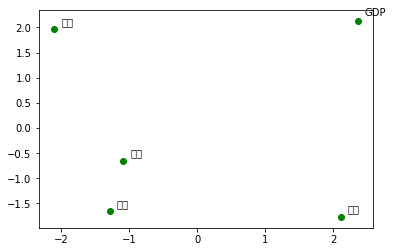

********** 可用的字体 **********
0


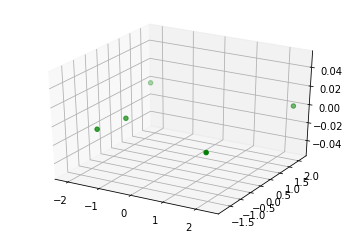

In [57]:
model = model_sg_jp_wzh
words = ['北京', '中期', '國際', '中國', '機構', 'GDP']
plot_2d(model, words)
plot_3d(model, words)

In [58]:
model_CBOW_zh_wzh.most_similar('中期')

[('通膨率', 0.9363266229629517),
 ('仍將', 0.9274097681045532),
 ('大體', 0.9246588945388794),
 ('受控', 0.9242647886276245),
 ('內將', 0.9242221117019653),
 ('適宜', 0.9212988018989563),
 ('大致', 0.9201127886772156),
 ('一段時間', 0.9179694652557373),
 ('逐步', 0.9169949293136597),
 ('通脹率', 0.9149724245071411)]

********** 可用的字体 **********
0


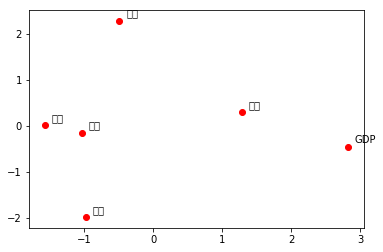

********** 可用的字体 **********
0


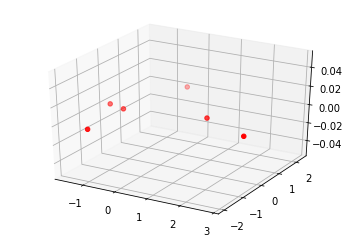

In [59]:
model = model_sg_zh_wzh
words = ['北京', '中期', '國際', '中國', '機構', 'GDP']
plot_2d(model, words, 'r')
plot_3d(model, words, 'r')

In [10]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
#print(mat_fonts)
output = subprocess.check_output('fc-list :lang=zh -f "%{family}\n"', shell=True)
print( '*' * 10, '系统可用的中文字体', '*' * 10)
print (output)
zh_fonts = set(f.split(',', 1)[0] for f in output.decode('utf-8').split('\n'))
available = mat_fonts & zh_fonts
print ('*' * 10, '可用的字体', '*' * 10)
for f in available:
     print (f)

********** 系统可用的中文字体 **********
b'Noto Sans CJK JP,Noto Sans CJK JP Thin\nNoto Sans CJK TC,Noto Sans CJK TC Bold\nNoto Sans CJK KR,Noto Sans CJK KR Medium\nNoto Sans CJK TC,Noto Sans CJK TC Thin\nNoto Sans Mono CJK JP,Noto Sans Mono CJK JP Bold\nNoto Sans Mono CJK KR,Noto Sans Mono CJK KR Bold\nNoto Sans CJK JP,Noto Sans CJK JP Black\nNoto Sans CJK SC,Noto Sans CJK SC Bold\nNoto Sans CJK SC,Noto Sans CJK SC Regular\nNoto Sans CJK JP,Noto Sans CJK JP DemiLight\nNoto Sans CJK TC,Noto Sans CJK TC DemiLight\nNoto Sans Mono CJK JP,Noto Sans Mono CJK JP Regular\nNoto Sans CJK JP,Noto Sans CJK JP Light\nNoto Sans Mono CJK SC,Noto Sans Mono CJK SC Bold\nNoto Sans CJK TC,Noto Sans CJK TC Regular\nNoto Sans CJK SC,Noto Sans CJK SC Medium\nNoto Sans Mono CJK KR,Noto Sans Mono CJK KR Regular\nNoto Sans CJK SC,Noto Sans CJK SC Light\nNoto Sans Mono CJK TC,Noto Sans Mono CJK TC Bold\nNoto Sans CJK SC,Noto Sans CJK SC Black\nNoto Sans CJK TC,Noto Sans CJK TC Medium\nNoto Sans CJK TC,Noto Sans CJK TC 

In [11]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/R2016hwang/.pyenv/versions/3.6.2/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [63]:
vocab = model_CBOW_zh_wzh.wv.vocab

In [64]:
vocab

{'惠譽': <gensim.models.keyedvectors.Vocab at 0x7f9ba33f6ba8>,
 '預計': <gensim.models.keyedvectors.Vocab at 0x7f9b4a8bee80>,
 'GDP': <gensim.models.keyedvectors.Vocab at 0x7f9b4a8bef60>,
 '增速': <gensim.models.keyedvectors.Vocab at 0x7f9b4a8bef98>,
 '今明兩年': <gensim.models.keyedvectors.Vocab at 0x7f9be9882cf8>,
 '放緩': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845128>,
 '至': <gensim.models.keyedvectors.Vocab at 0x7f9b4a8450b8>,
 '與': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845080>,
 '但': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845048>,
 '中期': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845160>,
 '前景': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845198>,
 '看好': <gensim.models.keyedvectors.Vocab at 0x7f9b4a8451d0>,
 '路透': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845208>,
 '北京': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845240>,
 '日電': <gensim.models.keyedvectors.Vocab at 0x7f9b4a845278>,
 '國際': <gensim.models.keyedvectors.Vocab at 0x7f9b4a8452b0>,
 '評級': <gensim.models.ke

In [37]:
vocab = model_sg_en_wzh.wv.vocab

In [38]:
vocab

{'fiat': <gensim.models.keyedvectors.Vocab at 0x7f9bad1ed828>,
 'ceo': <gensim.models.keyedvectors.Vocab at 0x7f9ba97937f0>,
 'say': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793780>,
 'plan': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793860>,
 'spin': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793b70>,
 'car': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793be0>,
 'palermo': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793c50>,
 'sicily': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793cc0>,
 'jan': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793d30>,
 'fia': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793da0>,
 'mi': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793e10>,
 'chief': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793e80>,
 'executive': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793eb8>,
 'alessandro': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793ef0>,
 'thursday': <gensim.models.keyedvectors.Vocab at 0x7f9ba9793f28>,
 'be': <gensim.models.keyedvectors.Vocab 

In [39]:
vocab = model_CBOW_jp_wzh.wv.vocab

In [40]:
vocab

{'自動車': <gensim.models.keyedvectors.Vocab at 0x7f9c01298208>,
 '部門': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e470>,
 '分社化': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e320>,
 '計画': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e208>,
 'FIAT': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e198>,
 'ＣＥＯ': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e160>,
 'パレルモ': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e128>,
 'イタリア': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e240>,
 'シチリア島': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e2b0>,
 'ロイター': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e550>,
 '伊': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e588>,
 'フィアット': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e5c0>,
 '最高経営責任者': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e5f8>,
 '赤字': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e630>,
 '続く': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e668>,
 'いる': <gensim.models.keyedvectors.Vocab at 0x7f9bae04e6a0>,
 '分

In [68]:
model_CBOW_en_wzh["china"].shape

(200,)